In [82]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [83]:
import os
path = '/content/gdrive/My Drive/Colab Notebooks'
os.chdir(path)

In [84]:
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
openjdk version "11.0.11" 2021-04-20
OpenJDK Runtime Environment (build 11.0.11+9-Ubuntu-0ubuntu2.18.04)
OpenJDK 64-Bit Server VM (build 11.0.11+9-Ubuntu-0ubuntu2.18.04, mixed mode, sharing)


In [85]:
!pip install h2o

In [86]:
!pip install category_encoders

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv('Placement_Data_Full_Class.csv')
df.sample(10)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
74,75,M,56.60,Central,64.8,Central,Commerce,70.20,Comm&Mgmt,No,84.27,Mkt&Fin,67.20,Placed,336000.0
213,214,F,74.00,Others,66.0,Others,Commerce,58.00,Comm&Mgmt,No,70.00,Mkt&HR,60.23,Placed,204000.0
193,194,F,60.00,Central,63.0,Central,Arts,56.00,Others,Yes,80.00,Mkt&HR,56.63,Placed,300000.0
62,63,F,86.50,Others,64.2,Others,Science,67.40,Sci&Tech,No,59.00,Mkt&Fin,59.69,Placed,240000.0
38,39,F,73.00,Others,58.0,Others,Science,66.00,Comm&Mgmt,No,53.70,Mkt&HR,56.86,Placed,240000.0
209,210,M,62.00,Central,72.0,Central,Commerce,65.00,Comm&Mgmt,No,67.00,Mkt&Fin,56.49,Placed,216000.0
175,176,M,63.00,Others,62.0,Others,Science,65.00,Sci&Tech,No,87.50,Mkt&HR,60.69,Not Placed,NaN
173,174,F,52.00,Others,52.0,Others,Science,55.00,Sci&Tech,No,67.00,Mkt&HR,59.32,Not Placed,NaN
54,55,F,74.00,Central,60.0,Others,Science,69.00,Comm&Mgmt,No,78.00,Mkt&HR,65.56,Placed,216000.0
164,165,F,67.16,Central,72.5,Central,Commerce,63.35,Comm&Mgmt,No,53.04,Mkt&Fin,65.52,Placed,250000.0


In [89]:
df.shape

(215, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


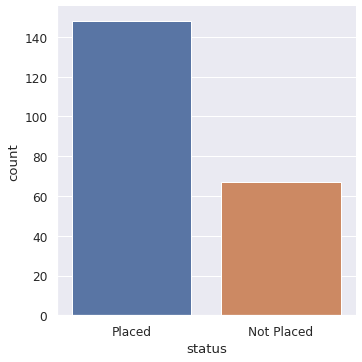

In [90]:
sns.catplot('status', data = df, kind = 'count')

In [91]:
df.isna().sum()*100/df.shape[0]

sl_no              0.000000
gender             0.000000
ssc_p              0.000000
ssc_b              0.000000
hsc_p              0.000000
hsc_b              0.000000
hsc_s              0.000000
degree_p           0.000000
degree_t           0.000000
workex             0.000000
etest_p            0.000000
specialisation     0.000000
mba_p              0.000000
status             0.000000
salary            31.162791
dtype: float64

In [92]:
from pandas.api.types import is_numeric_dtype
type_of_col = [is_numeric_dtype(df[x]) for x in df.columns]
numerical_columns = df.columns[type_of_col]
numerical_columns = numerical_columns[1:]
no_numerical_columns = df.columns[np.logical_not(type_of_col)]

Visualizações da Relação entre as variáveis existentes e o indivíduo estar empregado ou não

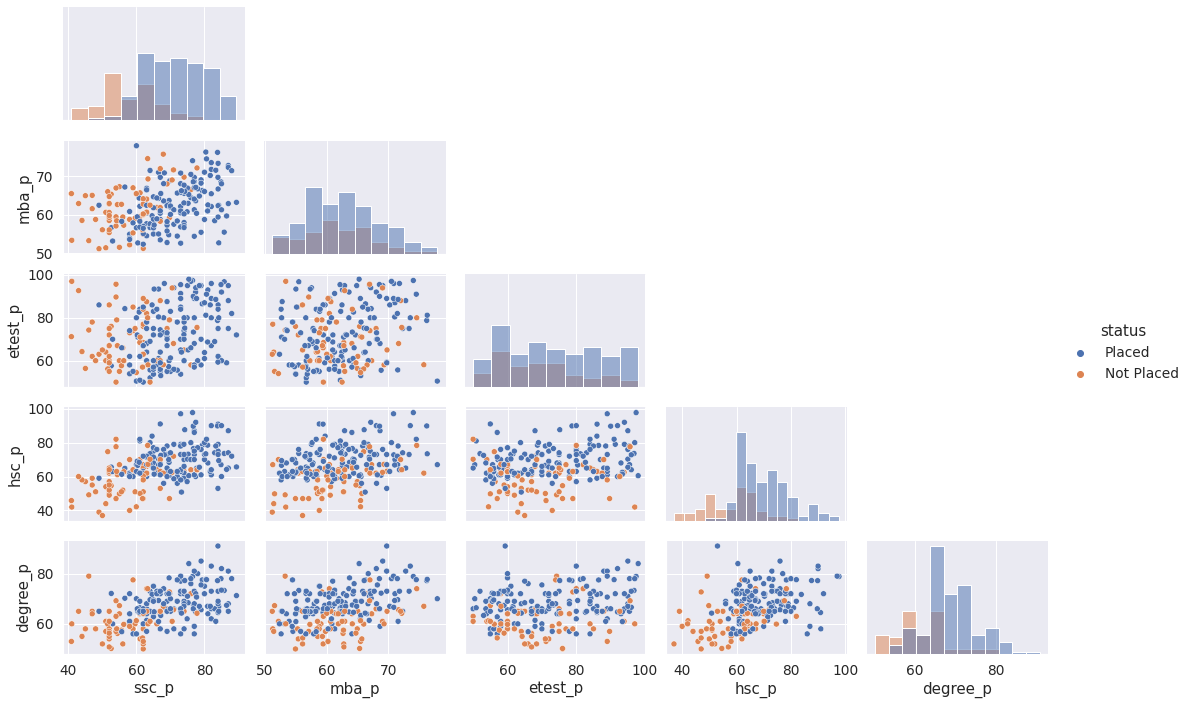

In [93]:
use_in_pariplot = numerical_columns.to_list() + ['status']
use_in_pariplot = set(use_in_pariplot) - set(['salary'])
sns.set(font_scale=1.25)
g = sns.pairplot(df[use_in_pariplot], hue = 'status' , diag_kind="hist", aspect=1.5, height = 2, corner=True)
handles = g._legend_data.values()
labels = g._legend_data.keys()
# g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)
# g.fig.subplots_adjust(top=0.92, bottom=0.08)
plt.show()

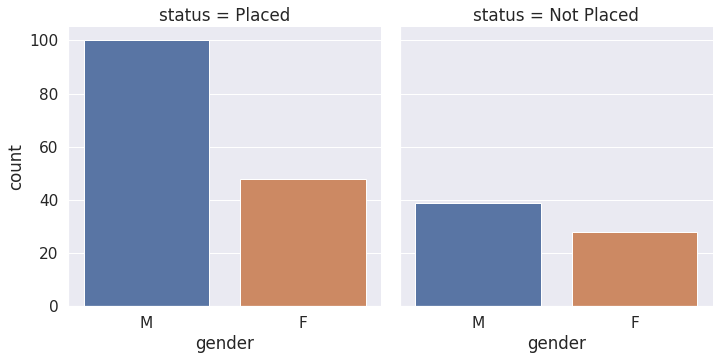

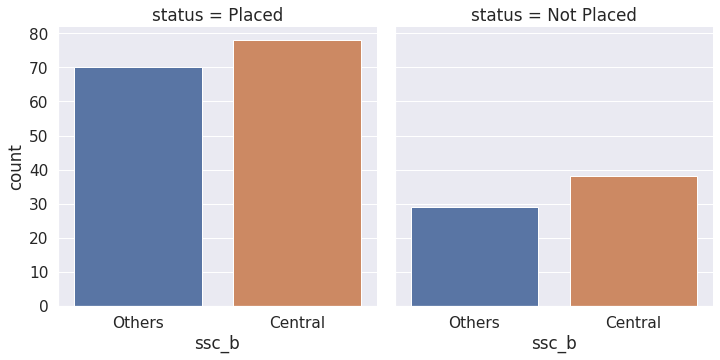

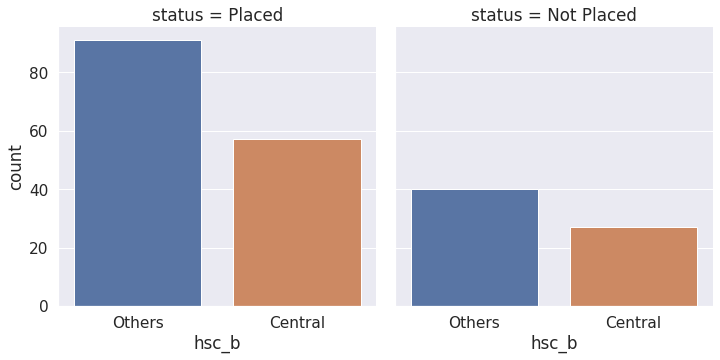

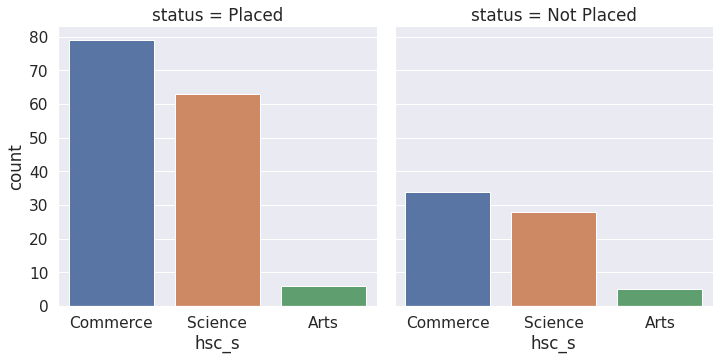

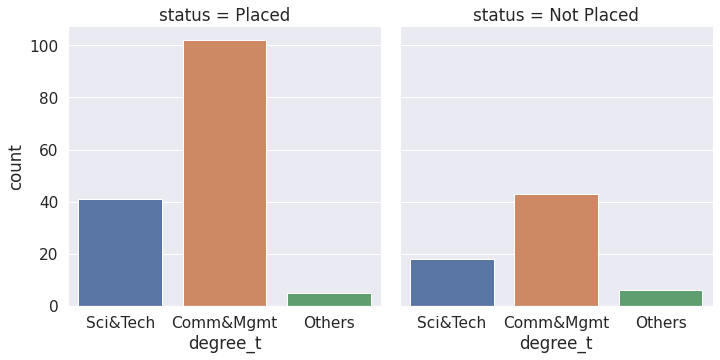

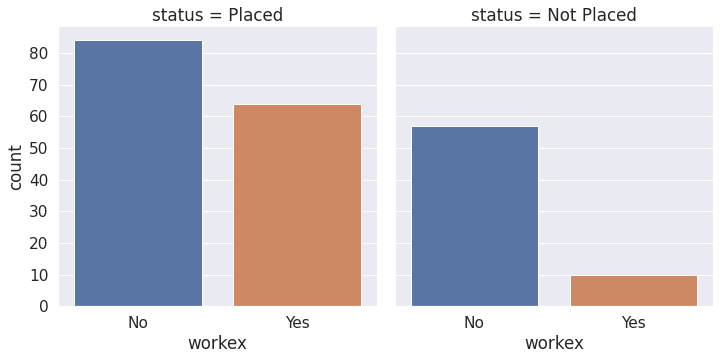

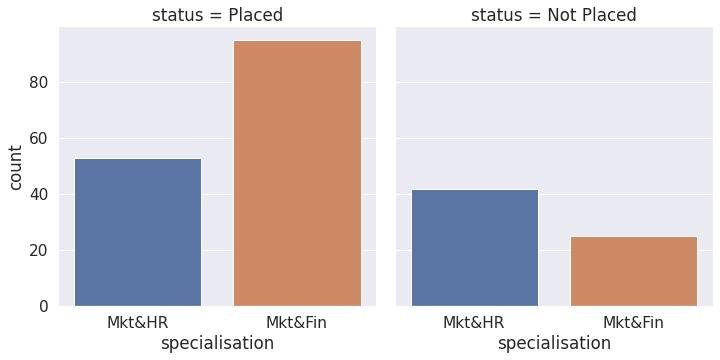

In [94]:
for col in no_numerical_columns[:-1]:
  sns.set(font_scale=1.4)
  sns.catplot(x = col, kind = 'count', aspect=1, col="status", data = df)
  plt.show()



Visualizações entre as características individuais e o salário recebido.

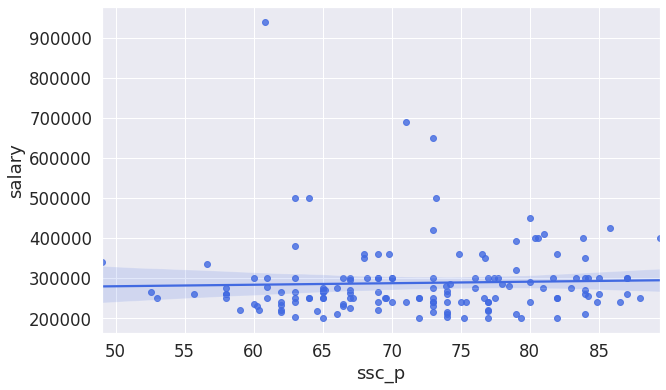

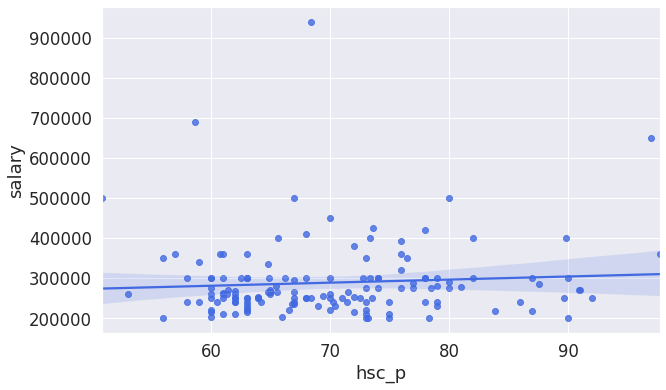

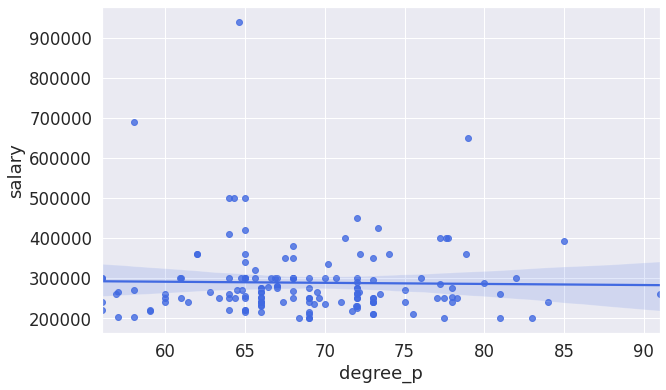

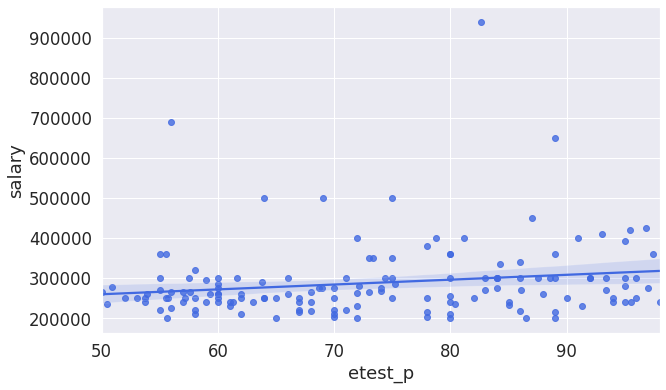

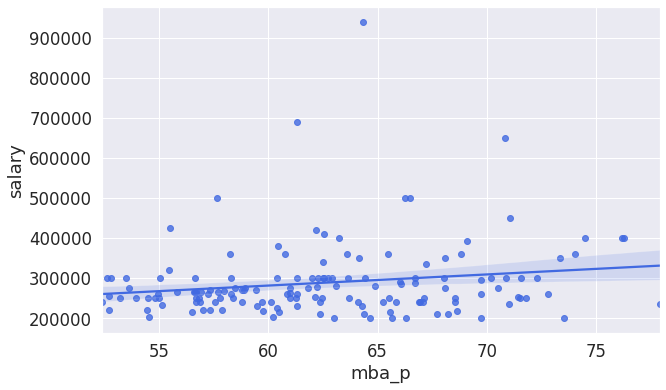

In [95]:
sns.set(font_scale=1.5)
for col in numerical_columns[:-1]:
  fig, ax = plt.subplots(figsize = (10, 6))
  
  sns.regplot(x= col, y = 'salary', data = df, ax = ax, color = 'royalblue')
  # ax.set(title = f'Relação entre {col.upper()} e o Salário Recebido')
  plt.show()

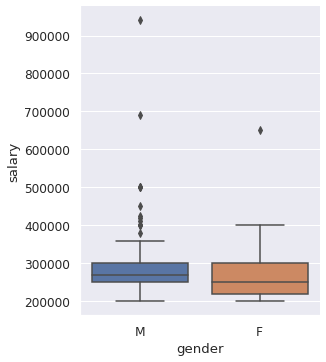

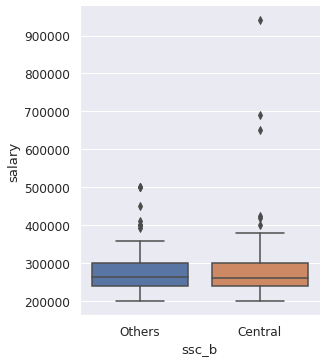

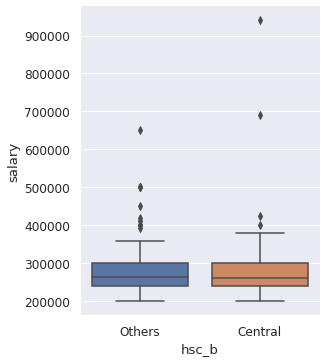

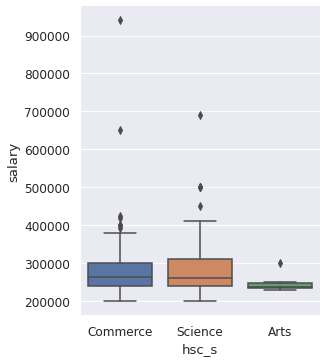

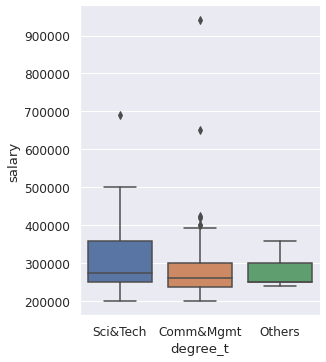

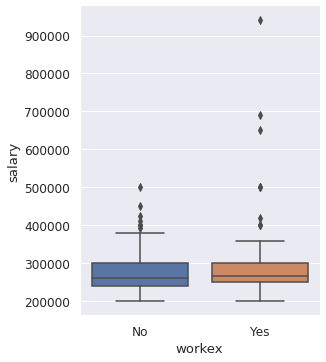

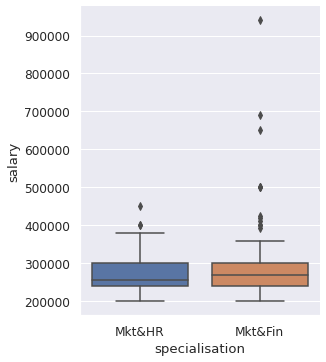

In [96]:
sns.set(font_scale=1.1)
for col in no_numerical_columns[:-1]:
  sns.catplot(x = col, y = "salary", kind = 'box', data = df, aspect=0.9)
  plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


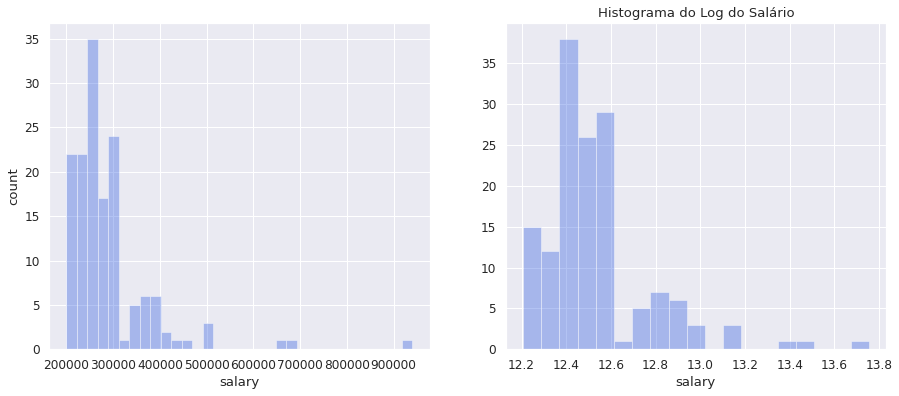

In [97]:
fig, ax = plt.subplots(1,2, figsize = (15, 6))
sns.distplot(df['salary'], color = 'royalblue', ax = ax[0], kde = False)
sns.distplot(np.log(df['salary']), color = 'royalblue', ax = ax[1], kde = False)
ax[0].set(ylabel ='count')
ax[1].set(title = 'Histograma do Log do Salário')
plt.show()

In [98]:
status_map = {'Placed': 0, 'Not Placed': 1}
df['status'] = df['status'].map(status_map)

In [99]:
from category_encoders.cat_boost import CatBoostEncoder
columns_cat = ['gender', 'workex','ssc_b', 'hsc_b','specialisation','hsc_s', 'degree_t']
encoder = CatBoostEncoder(cols = columns_cat)
features_encoded = encoder.fit_transform(df[columns_cat], df['status'])

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [100]:
df_for_classification = df.iloc[:,:-1].copy()
for col in columns_cat:
  df_for_classification[col] = features_encoded[col].values.ravel()

In [101]:
df_for_classification.sample(5)

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
81,82,0.226233,81.7,0.275893,63.0,0.240673,0.303283,67.0,0.281235,0.157697,86.00,0.173159,70.20,0
6,7,0.311628,46.0,0.437209,49.2,0.327907,0.103876,79.0,0.103876,0.262326,74.28,0.262326,53.29,1
122,123,0.347056,66.5,0.333009,66.8,0.352147,0.262326,69.3,0.262490,0.143558,80.40,0.175880,71.00,0
2,3,0.103876,65.0,0.155814,68.0,0.311628,0.311628,64.0,0.311628,0.155814,75.00,0.155814,57.80,0
90,91,0.397545,85.0,0.245905,90.0,0.213427,0.312482,82.0,0.274788,0.368358,92.00,0.172438,68.03,0


In [102]:
import h2o

In [103]:
from sklearn.preprocessing import StandardScaler
input_ml = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',\
            'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']
output_ml = ['status']
sc = StandardScaler()
data = pd.DataFrame(sc.fit_transform(df_for_classification[input_ml]), columns=input_ml)
data[output_ml] = df_for_classification[output_ml]

In [104]:
h2o.init()
hf = h2o.H2OFrame(data[input_ml + output_ml])

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 6 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_43l8ii
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.034 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [110]:
from h2o.automl import H2OAutoML

hf[output_ml[0]] = hf[output_ml[0]].asfactor()
# Run AutoML for 25 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=25, seed=1, nfolds = 10, balance_classes = True, sort_metric = 'AUC', exclude_algos = ['StackedEnsemble'])
aml.train(x=input_ml, y=output_ml[0], training_frame=hf)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |███████████████
16:29:21.403: GBM_5_AutoML_20210625_162853 [GBM def_5] failed: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210625_162853.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 193.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 193.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 193.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 193.0.
ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 193.0.
ERRR on field: _min_rows: The 

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20210625_162853,0.930214,0.313262,0.870133,0.127975,0.315895,0.0997895
DeepLearning_grid__3_AutoML_20210625_162853_model_1,0.927995,0.332926,0.881347,0.131353,0.31491,0.0991685
GBM_grid__1_AutoML_20210625_162853_model_4,0.927088,0.380454,0.860473,0.132059,0.343508,0.117998
GBM_4_AutoML_20210625_162853,0.925777,0.361691,0.864224,0.130093,0.337237,0.113728
DeepLearning_grid__1_AutoML_20210625_162853_model_2,0.925474,0.358806,0.87283,0.152481,0.322626,0.104087
DeepLearning_grid__2_AutoML_20210625_162853_model_1,0.920936,0.34754,0.866126,0.145018,0.323889,0.104904
GBM_1_AutoML_20210625_162853,0.919726,0.409396,0.846494,0.131202,0.359944,0.12956
GBM_grid__1_AutoML_20210625_162853_model_3,0.919524,0.343998,0.866463,0.131353,0.326646,0.106698
XGBoost_grid__1_AutoML_20210625_162853_model_1,0.917003,0.38557,0.845717,0.134732,0.332253,0.110392
GBM_2_AutoML_20210625_162853,0.916297,0.372414,0.845247,0.154447,0.343192,0.117781


In [112]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse,training_time_ms,predict_time_per_row_ms,algo
GLM_1_AutoML_20210625_162853,0.930214,0.313262,0.870133,0.127975,0.315895,0.0997895,111,0.039494,GLM
DeepLearning_grid__3_AutoML_20210625_162853_model_1,0.927995,0.332926,0.881347,0.131353,0.31491,0.0991685,8774,0.059892,DeepLearning
GBM_grid__1_AutoML_20210625_162853_model_4,0.927088,0.380454,0.860473,0.132059,0.343508,0.117998,316,0.053538,GBM
GBM_4_AutoML_20210625_162853,0.925777,0.361691,0.864224,0.130093,0.337237,0.113728,256,0.046981,GBM
DeepLearning_grid__1_AutoML_20210625_162853_model_2,0.925474,0.358806,0.87283,0.152481,0.322626,0.104087,12151,0.044421,DeepLearning
DeepLearning_grid__2_AutoML_20210625_162853_model_1,0.920936,0.34754,0.866126,0.145018,0.323889,0.104904,5249,0.06554,DeepLearning
GBM_1_AutoML_20210625_162853,0.919726,0.409396,0.846494,0.131202,0.359944,0.12956,251,0.056671,GBM
GBM_grid__1_AutoML_20210625_162853_model_3,0.919524,0.343998,0.866463,0.131353,0.326646,0.106698,181,0.040623,GBM
XGBoost_grid__1_AutoML_20210625_162853_model_1,0.917003,0.38557,0.845717,0.134732,0.332253,0.110392,146,0.085934,XGBoost
GBM_2_AutoML_20210625_162853,0.916297,0.372414,0.845247,0.154447,0.343192,0.117781,285,0.042002,GBM


$$\sum_{i=0}^{n} y_{true}\cdot log(y_{pred}) + (1-y_{true})\cdot log(1-y_{pred})$$

In [111]:
aml.leader

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20210625_162853


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,binomial,logit,Ridge ( lambda = 0.008537 ),"nlambda = 30, lambda.max = 28.089, lambda.min = 0.008537, lambda.1...",12,12,36,automl_training_py_730_sid_b364




ModelMetricsBinomialGLM: glm
** Reported on train data. **

MSE: 0.08286425099823067
RMSE: 0.28786151357593925
LogLoss: 0.26809396362871923
Null degrees of freedom: 214
Residual degrees of freedom: 202
Null deviance: 266.7707080623275
Residual deviance: 115.28040436034928
AIC: 141.28040436034928
AUC: 0.9521984671238404
AUCPR: 0.9076464029071654
Gini: 0.9043969342476808

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.38786121021946296: 


,,0,1,Error,Rate
0,0,136.0,12.0,0.0811,(12.0/148.0)
1,1,8.0,59.0,0.1194,(8.0/67.0)
2,Total,144.0,71.0,0.093,(20.0/215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.387861,0.855072,70.0
1,max f2,0.267500,0.909091,83.0
2,max f0point5,0.395421,0.845481,68.0
3,max accuracy,0.395421,0.906977,68.0
4,max precision,0.999229,1.000000,0.0
5,max recall,0.044259,1.000000,142.0
6,max specificity,0.999229,1.000000,0.0
7,max absolute_mcc,0.387861,0.787381,70.0
8,max min_per_class_accuracy,0.351662,0.895522,73.0
9,max mean_per_class_accuracy,0.267500,0.910044,83.0



Gains/Lift Table: Avg response rate: 31.16 %, avg score: 31.16 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013953,0.987861,3.208955,3.208955,1.000000,0.994662,1.000000,0.994662,0.044776,0.044776,220.895522,220.895522,0.044776
1,2,0.023256,0.976402,3.208955,3.208955,1.000000,0.978874,1.000000,0.988347,0.029851,0.074627,220.895522,220.895522,0.074627
2,3,0.032558,0.974858,3.208955,3.208955,1.000000,0.976007,1.000000,0.984821,0.029851,0.104478,220.895522,220.895522,0.104478
3,4,0.041860,0.970277,3.208955,3.208955,1.000000,0.972043,1.000000,0.981981,0.029851,0.134328,220.895522,220.895522,0.134328
4,5,0.051163,0.968952,3.208955,3.208955,1.000000,0.969928,1.000000,0.979790,0.029851,0.164179,220.895522,220.895522,0.164179
5,6,0.102326,0.937811,3.208955,3.208955,1.000000,0.958149,1.000000,0.968970,0.164179,0.328358,220.895522,220.895522,0.328358
6,7,0.153488,0.826029,2.625509,3.014473,0.818182,0.879157,0.939394,0.939032,0.134328,0.462687,162.550882,201.447309,0.449173
7,8,0.200000,0.677766,2.567164,2.910448,0.800000,0.758465,0.906977,0.897040,0.119403,0.582090,156.716418,191.044776,0.555063
8,9,0.302326,0.425888,2.333786,2.715270,0.727273,0.563785,0.846154,0.784246,0.238806,0.820896,133.378562,171.526980,0.753328
9,10,0.400000,0.255284,1.375267,2.388060,0.428571,0.336900,0.744186,0.675010,0.134328,0.955224,37.526652,138.805970,0.806575




ModelMetricsBinomialGLM: glm
** Reported on cross-validation data. **

MSE: 0.09978949866008217
RMSE: 0.3158947588360436
LogLoss: 0.31326200798964554
Null degrees of freedom: 214
Residual degrees of freedom: 202
Null deviance: 269.48739924792267
Residual deviance: 134.70266343554758
AIC: 160.70266343554758
AUC: 0.9302137958854377
AUCPR: 0.870132758250546
Gini: 0.8604275917708755

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.31688925891568026: 


,,0,1,Error,Rate
0,0,130.0,18.0,0.1216,(18.0/148.0)
1,1,9.0,58.0,0.1343,(9.0/67.0)
2,Total,139.0,76.0,0.1256,(27.0/215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.316889,0.811189,75.0
1,max f2,0.194198,0.869565,99.0
2,max f0point5,0.453366,0.814332,59.0
3,max accuracy,0.453366,0.874419,59.0
4,max precision,0.999247,1.000000,0.0
5,max recall,0.034336,1.000000,154.0
6,max specificity,0.999247,1.000000,0.0
7,max absolute_mcc,0.316889,0.720869,75.0
8,max min_per_class_accuracy,0.316889,0.865672,75.0
9,max mean_per_class_accuracy,0.316889,0.872025,75.0



Gains/Lift Table: Avg response rate: 31.16 %, avg score: 30.65 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013953,0.986251,3.208955,3.208955,1.000000,0.994068,1.000000,0.994068,0.044776,0.044776,220.895522,220.895522,0.044776
1,2,0.023256,0.980109,3.208955,3.208955,1.000000,0.982520,1.000000,0.989448,0.029851,0.074627,220.895522,220.895522,0.074627
2,3,0.032558,0.977075,3.208955,3.208955,1.000000,0.978138,1.000000,0.986217,0.029851,0.104478,220.895522,220.895522,0.104478
3,4,0.041860,0.974311,3.208955,3.208955,1.000000,0.975745,1.000000,0.983890,0.029851,0.134328,220.895522,220.895522,0.134328
4,5,0.051163,0.971129,3.208955,3.208955,1.000000,0.972848,1.000000,0.981882,0.029851,0.164179,220.895522,220.895522,0.164179
5,6,0.102326,0.929169,3.208955,3.208955,1.000000,0.951429,1.000000,0.966656,0.164179,0.328358,220.895522,220.895522,0.328358
6,7,0.153488,0.827374,2.333786,2.917232,0.727273,0.874527,0.909091,0.935946,0.119403,0.447761,133.378562,191.723202,0.427491
7,8,0.200000,0.683756,2.246269,2.761194,0.700000,0.738316,0.860465,0.889986,0.104478,0.552239,124.626866,176.119403,0.511698
8,9,0.302326,0.414586,2.187924,2.567164,0.681818,0.528685,0.800000,0.767699,0.223881,0.776119,118.792402,156.716418,0.688282
9,10,0.400000,0.251503,0.916844,2.164179,0.285714,0.328777,0.674419,0.660521,0.089552,0.865672,-8.315565,116.417910,0.676482




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9160173,0.042876817,0.95454544,0.90909094,0.90909094,0.8636364,1.0,0.85714287,0.9047619,0.95238096,0.9047619,0.9047619
1,auc,0.947971,0.041653447,0.9882353,0.96581197,0.85882354,0.9305556,1.0,0.9166667,0.9591837,0.9852941,0.93877554,0.93636364
2,err,0.08398268,0.042876817,0.045454547,0.09090909,0.09090909,0.13636364,0.0,0.14285715,0.0952381,0.04761905,0.0952381,0.0952381
3,err_count,1.8,0.9189366,1.0,2.0,2.0,3.0,0.0,3.0,2.0,1.0,2.0,2.0
4,f0point5,0.8453492,0.099809356,0.86206895,0.8490566,0.88235295,0.625,1.0,0.81632656,0.81395346,0.8333333,0.81395346,0.9574468
5,f1,0.86673576,0.078935646,0.90909094,0.9,0.75,0.72727275,1.0,0.84210527,0.875,0.8888889,0.875,0.9
6,f2,0.9003619,0.09995398,0.96153843,0.9574468,0.65217394,0.8695652,1.0,0.8695652,0.9459459,0.95238096,0.9459459,0.8490566
7,lift_top_group,3.5903535,1.2532154,4.4,2.4444444,4.4,5.5,3.6666667,2.3333333,3.0,5.25,3.0,1.9090909
8,logloss,0.30054465,0.108680345,0.17225364,0.29404372,0.33483374,0.33807185,0.17135835,0.44610283,0.30107185,0.1713693,0.29516932,0.48117176
9,max_per_class_error,0.1472359,0.10710052,0.05882353,0.15384616,0.4,0.16666667,0.0,0.16666667,0.14285715,0.05882353,0.14285715,0.18181819



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_xval,deviance_se,alpha,iterations,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-06-25 16:29:03,0.000 sec,2,.28E2,13,1.226255,1.242708,0.058818,0.0,NaN,,,,,,,
1,,2021-06-25 16:29:03,0.001 sec,4,.17E2,13,1.217745,1.235295,0.058480,0.0,NaN,,,,,,,
2,,2021-06-25 16:29:03,0.001 sec,6,.11E2,13,1.204578,1.223775,0.057963,0.0,NaN,,,,,,,
3,,2021-06-25 16:29:03,0.002 sec,8,.67E1,13,1.184653,1.206262,0.057190,0.0,NaN,,,,,,,
4,,2021-06-25 16:29:03,0.002 sec,10,.42E1,13,1.155517,1.180423,0.056088,0.0,NaN,,,,,,,
5,,2021-06-25 16:29:03,0.003 sec,12,.26E1,13,1.114936,1.144010,0.054616,0.0,NaN,,,,,,,
6,,2021-06-25 16:29:03,0.004 sec,14,.16E1,13,1.062002,1.095786,0.052844,0.0,NaN,,,,,,,
7,,2021-06-25 16:29:03,0.004 sec,16,.1E1,13,0.998271,1.036744,0.051000,0.0,NaN,,,,,,,
8,,2021-06-25 16:29:03,0.005 sec,18,.62E0,13,0.927814,0.970452,0.049452,0.0,NaN,,,,,,,
9,,2021-06-25 16:29:03,0.005 sec,20,.39E0,13,0.855882,0.902077,0.048568,0.0,NaN,,,,,,,



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ssc_p,1.643266,1.000000,0.269130
1,hsc_p,0.952417,0.579588,0.155985
2,mba_p,0.923656,0.562086,0.151274
3,degree_p,0.782605,0.476250,0.128173
4,workex,0.646623,0.393499,0.105902
5,hsc_b,0.259582,0.157967,0.042514
6,ssc_b,0.220427,0.134139,0.036101
7,hsc_s,0.206594,0.125722,0.033835
8,specialisation,0.183406,0.111611,0.030038
9,etest_p,0.121932,0.074201,0.019970


In [113]:
print(h2o.get_model(lb[1, "model_id"]))

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__3_AutoML_20210625_162853_model_1


Status of Neuron Layers: predicting status, 2-class classification, bernoulli distribution, CrossEntropy loss, 5,852 weights/biases, 75.6 KB, 356,400 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,12,Input,20,,,,,,,,,
1,,2,50,RectifierDropout,40,0,0,0.00763103,0.0107314,0,0.031511,0.547283,-0.923827,0.38073
2,,3,50,RectifierDropout,40,0,0,0.0274561,0.0758713,0,-0.0532073,0.333296,-0.264889,0.399252
3,,4,50,RectifierDropout,40,0,0,0.164081,0.249225,0,-0.0192057,0.395512,-0.170425,0.444055
4,,5,2,Softmax,,0,0,0.0672486,0.195468,0,-0.130687,0.609967,0.0340925,0.213603




ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.004423655919486392
RMSE: 0.06651056998317179
LogLoss: 0.02468201441338258
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.6694214299390616: 


,,0,1,Error,Rate
0,0,148.0,0.0,0.0,(0.0/148.0)
1,1,0.0,149.0,0.0,(0.0/149.0)
2,Total,148.0,149.0,0.0,(0.0/297.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,6.694214e-01,1.000000,34.0
1,max f2,6.694214e-01,1.000000,34.0
2,max f0point5,6.694214e-01,1.000000,34.0
3,max accuracy,6.694214e-01,1.000000,34.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,6.694214e-01,1.000000,34.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,6.694214e-01,1.000000,34.0
8,max min_per_class_accuracy,6.694214e-01,1.000000,34.0
9,max mean_per_class_accuracy,6.694214e-01,1.000000,34.0



Gains/Lift Table: Avg response rate: 50.17 %, avg score: 49.82 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.074074,1.000000e+00,1.993289,1.993289,1.0,1.000000e+00,1.000000,1.000000,0.147651,0.147651,99.328859,99.328859,0.147651
1,2,0.107744,1.000000e+00,1.993289,1.993289,1.0,1.000000e+00,1.000000,1.000000,0.067114,0.214765,99.328859,99.328859,0.214765
2,3,0.151515,1.000000e+00,1.993289,1.993289,1.0,1.000000e+00,1.000000,1.000000,0.087248,0.302013,99.328859,99.328859,0.302013
3,4,0.202020,1.000000e+00,1.993289,1.993289,1.0,1.000000e+00,1.000000,1.000000,0.100671,0.402685,99.328859,99.328859,0.402685
4,5,0.299663,9.999984e-01,1.993289,1.993289,1.0,9.999998e-01,1.000000,1.000000,0.194631,0.597315,99.328859,99.328859,0.597315
5,6,0.404040,9.957373e-01,1.993289,1.993289,1.0,9.993422e-01,1.000000,0.999830,0.208054,0.805369,99.328859,99.328859,0.805369
6,7,0.501684,6.694214e-01,1.993289,1.993289,1.0,8.704886e-01,1.000000,0.974656,0.194631,1.000000,99.328859,99.328859,1.000000
7,8,0.599327,1.418516e-02,0.000000,1.668539,0.0,9.136733e-02,0.837079,0.830750,0.000000,1.000000,-100.000000,66.853933,0.804054
8,9,0.700337,2.398736e-04,0.000000,1.427885,0.0,3.338836e-03,0.716346,0.711411,0.000000,1.000000,-100.000000,42.788462,0.601351
9,10,0.797980,1.547185e-12,0.000000,1.253165,0.0,1.461359e-05,0.628692,0.624363,0.000000,1.000000,-100.000000,25.316456,0.405405




ModelMetricsBinomial: deeplearning
** Reported on cross-validation data. **

MSE: 0.09916845404476904
RMSE: 0.3149102317244853
LogLoss: 0.33292564593142865
Mean Per-Class Error: 0.13135336829366684
AUC: 0.9279951593384429
AUCPR: 0.8813466952269664
Gini: 0.8559903186768858

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.33616156996957: 


,,0,1,Error,Rate
0,0,129.0,19.0,0.1284,(19.0/148.0)
1,1,9.0,58.0,0.1343,(9.0/67.0)
2,Total,138.0,77.0,0.1302,(28.0/215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,3.361616e-01,0.805556,72.0
1,max f2,1.416404e-01,0.858311,94.0
2,max f0point5,8.292817e-01,0.849421,43.0
3,max accuracy,7.565910e-01,0.879070,50.0
4,max precision,1.000000e+00,1.000000,0.0
5,max recall,7.659058e-04,1.000000,178.0
6,max specificity,1.000000e+00,1.000000,0.0
7,max absolute_mcc,3.361616e-01,0.712236,72.0
8,max min_per_class_accuracy,3.361616e-01,0.865672,72.0
9,max mean_per_class_accuracy,3.361616e-01,0.868647,72.0



Gains/Lift Table: Avg response rate: 31.16 %, avg score: 32.86 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013953,1.000000e+00,3.208955,3.208955,1.000000,1.000000,1.000000,1.000000,0.044776,0.044776,220.895522,220.895522,0.044776
1,2,0.023256,9.999988e-01,3.208955,3.208955,1.000000,1.000000,1.000000,1.000000,0.029851,0.074627,220.895522,220.895522,0.074627
2,3,0.032558,9.999829e-01,3.208955,3.208955,1.000000,0.999993,1.000000,0.999998,0.029851,0.104478,220.895522,220.895522,0.104478
3,4,0.041860,9.999375e-01,3.208955,3.208955,1.000000,0.999969,1.000000,0.999991,0.029851,0.134328,220.895522,220.895522,0.134328
4,5,0.051163,9.989467e-01,3.208955,3.208955,1.000000,0.999776,1.000000,0.999952,0.029851,0.164179,220.895522,220.895522,0.164179
5,6,0.102326,9.853541e-01,3.208955,3.208955,1.000000,0.992814,1.000000,0.996383,0.164179,0.328358,220.895522,220.895522,0.328358
6,7,0.153488,9.547608e-01,2.625509,3.014473,0.818182,0.971944,0.939394,0.988237,0.134328,0.462687,162.550882,201.447309,0.449173
7,8,0.200000,8.822395e-01,2.888060,2.985075,0.900000,0.920535,0.930233,0.972492,0.134328,0.597015,188.805970,198.507463,0.576745
8,9,0.302326,5.478583e-01,1.604478,2.517796,0.500000,0.734081,0.784615,0.891799,0.164179,0.761194,60.447761,151.779564,0.666599
9,10,0.400000,2.191110e-01,1.222459,2.201493,0.380952,0.355832,0.686047,0.760923,0.119403,0.880597,22.245913,120.149254,0.698165




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.92510825,0.055842478,0.95454544,0.95454544,0.90909094,0.90909094,1.0,0.85714287,0.85714287,1.0,0.85714287,0.95238096
1,auc,0.9340569,0.06702689,0.9764706,0.96581197,0.7882353,0.9027778,1.0,0.8796296,0.9183673,1.0,0.9183673,0.9909091
2,err,0.074891776,0.055842478,0.045454547,0.045454547,0.09090909,0.09090909,0.0,0.14285715,0.14285715,0.0,0.14285715,0.04761905
3,err_count,1.6,1.1737878,1.0,1.0,2.0,2.0,0.0,3.0,3.0,0.0,3.0,1.0
4,f0point5,0.8908571,0.090320334,0.86206895,0.9756098,0.88235295,0.8333333,1.0,0.90909094,0.7692308,1.0,0.7446808,0.9322034
5,f1,0.8646985,0.1131877,0.90909094,0.9411765,0.75,0.6666667,1.0,0.8,0.8,1.0,0.8235294,0.95652175
6,f2,0.8529173,0.15912487,0.96153843,0.90909094,0.65217394,0.5555556,1.0,0.71428573,0.8333333,1.0,0.92105263,0.98214287
7,lift_top_group,3.5903535,1.2532154,4.4,2.4444444,4.4,5.5,3.6666667,2.3333333,3.0,5.25,3.0,1.9090909
8,logloss,0.3331689,0.19297555,0.18766189,0.210964,0.61366343,0.5419249,0.059332583,0.45482516,0.54482895,0.18230361,0.3421754,0.19400899
9,max_per_class_error,0.18604109,0.1722823,0.05882353,0.11111111,0.4,0.5,0.0,0.33333334,0.14285715,0.0,0.21428572,0.1



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-06-25 16:35:00,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-06-25 16:35:00,1 min 22.426 sec,23385 obs/sec,10.0,1,2970.0,0.376008,0.492415,0.434467,0.934518,0.936349,1.993289,0.127946
2,,2021-06-25 16:35:05,1 min 27.468 sec,39230 obs/sec,680.0,68,201960.0,0.110584,0.048709,0.951084,0.999819,0.999819,1.993289,0.003367
3,,2021-06-25 16:35:08,1 min 31.049 sec,40937 obs/sec,1200.0,120,356400.0,0.066511,0.024682,0.982305,1.000000,1.000000,1.993289,0.000000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ssc_p,1.000000,1.000000,0.118432
1,hsc_p,0.938235,0.938235,0.111117
2,degree_t,0.848505,0.848505,0.100490
3,degree_p,0.811747,0.811747,0.096137
4,hsc_s,0.739678,0.739678,0.087601
5,gender,0.732821,0.732821,0.086789
6,ssc_b,0.669449,0.669449,0.079284
7,etest_p,0.646767,0.646767,0.076598
8,mba_p,0.583459,0.583459,0.069100
9,hsc_b,0.561257,0.561257,0.066471


In [114]:
print(h2o.get_model(lb[2, "model_id"]))

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_grid__1_AutoML_20210625_162853_model_4


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,44.0,44.0,71396.0,9.0,15.0,14.0,42.0,164.0,124.63636




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.00011408949345931814
RMSE: 0.01068126834506643
LogLoss: 0.009189037106905478
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.976816458043701: 


,,0,1,Error,Rate
0,0,148.0,0.0,0.0,(0.0/148.0)
1,1,0.0,146.0,0.0,(0.0/146.0)
2,Total,148.0,146.0,0.0,(0.0/294.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.976816,1.000000,28.0
1,max f2,0.976816,1.000000,28.0
2,max f0point5,0.976816,1.000000,28.0
3,max accuracy,0.976816,1.000000,28.0
4,max precision,0.987291,1.000000,0.0
5,max recall,0.976816,1.000000,28.0
6,max specificity,0.987291,1.000000,0.0
7,max absolute_mcc,0.976816,1.000000,28.0
8,max min_per_class_accuracy,0.976816,1.000000,28.0
9,max mean_per_class_accuracy,0.976816,1.000000,28.0



Gains/Lift Table: Avg response rate: 49.66 %, avg score: 49.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013605,0.987102,2.013699,2.013699,1.000000,0.987196,1.000000,0.987196,0.027397,0.027397,101.369863,101.369863,0.027397
1,2,0.020408,0.987101,2.013699,2.013699,1.000000,0.987102,1.000000,0.987165,0.013699,0.041096,101.369863,101.369863,0.041096
2,3,0.034014,0.987100,2.013699,2.013699,1.000000,0.987100,1.000000,0.987139,0.027397,0.068493,101.369863,101.369863,0.068493
3,4,0.340136,0.987097,2.013699,2.013699,1.000000,0.987097,1.000000,0.987101,0.616438,0.684932,101.369863,101.369863,0.684932
4,5,0.401361,0.984260,2.013699,2.013699,1.000000,0.984617,1.000000,0.986722,0.123288,0.808219,101.369863,101.369863,0.808219
5,6,0.500000,0.022083,1.944261,2.000000,0.965517,0.949381,0.993197,0.979356,0.191781,1.000000,94.426075,100.000000,0.993243
6,7,0.598639,0.004924,0.000000,1.670455,0.000000,0.006886,0.829545,0.819119,0.000000,1.000000,-100.000000,67.045455,0.797297
7,8,0.700680,0.003466,0.000000,1.427184,0.000000,0.004161,0.708738,0.700436,0.000000,1.000000,-100.000000,42.718447,0.594595
8,9,0.799320,0.003302,0.000000,1.251064,0.000000,0.003319,0.621277,0.614409,0.000000,1.000000,-100.000000,25.106383,0.398649
9,10,0.897959,0.002707,0.000000,1.113636,0.000000,0.003157,0.553030,0.547264,0.000000,1.000000,-100.000000,11.363636,0.202703




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.117997837031107
RMSE: 0.3435081324089824
LogLoss: 0.38045395989798675
Mean Per-Class Error: 0.13135336829366684
AUC: 0.9270875352964905
AUCPR: 0.8604727998247679
Gini: 0.8541750705929809

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.11565977177930614: 


,,0,1,Error,Rate
0,0,131.0,17.0,0.1149,(17.0/148.0)
1,1,10.0,57.0,0.1493,(10.0/67.0)
2,Total,141.0,74.0,0.1256,(27.0/215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.115660,0.808511,73.0
1,max f2,0.062065,0.849582,90.0
2,max f0point5,0.338655,0.818182,51.0
3,max accuracy,0.132688,0.874419,71.0
4,max precision,0.998266,1.000000,0.0
5,max recall,0.014338,1.000000,136.0
6,max specificity,0.998266,1.000000,0.0
7,max absolute_mcc,0.115660,0.717382,73.0
8,max min_per_class_accuracy,0.106468,0.865672,76.0
9,max mean_per_class_accuracy,0.106468,0.868647,76.0



Gains/Lift Table: Avg response rate: 31.16 %, avg score: 22.00 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013953,0.986873,3.208955,3.208955,1.000000,0.993659,1.000000,0.993659,0.044776,0.044776,220.895522,220.895522,0.044776
1,2,0.023256,0.977775,3.208955,3.208955,1.000000,0.979892,1.000000,0.988152,0.029851,0.074627,220.895522,220.895522,0.074627
2,3,0.032558,0.971402,3.208955,3.208955,1.000000,0.974343,1.000000,0.984207,0.029851,0.104478,220.895522,220.895522,0.104478
3,4,0.041860,0.966871,3.208955,3.208955,1.000000,0.969355,1.000000,0.980906,0.029851,0.134328,220.895522,220.895522,0.134328
4,5,0.051163,0.957849,3.208955,3.208955,1.000000,0.962352,1.000000,0.977533,0.029851,0.164179,220.895522,220.895522,0.164179
5,6,0.102326,0.840096,2.917232,3.063094,0.909091,0.883555,0.954545,0.930544,0.149254,0.313433,191.723202,206.309362,0.306676
6,7,0.153488,0.683284,2.625509,2.917232,0.818182,0.786822,0.909091,0.882637,0.134328,0.447761,162.550882,191.723202,0.427491
7,8,0.200000,0.525719,2.567164,2.835821,0.800000,0.617873,0.883721,0.821064,0.119403,0.567164,156.716418,183.582090,0.533380
8,9,0.302326,0.191473,1.604478,2.419059,0.500000,0.329542,0.753846,0.654703,0.164179,0.731343,60.447761,141.905855,0.623235
9,10,0.400000,0.074428,1.680881,2.238806,0.523810,0.116812,0.697674,0.523357,0.164179,0.895522,68.088131,123.880597,0.719847




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9298701,0.039665483,0.95454544,1.0,0.95454544,0.8636364,0.95454544,0.9047619,0.9047619,0.9047619,0.9047619,0.95238096
1,auc,0.9356497,0.04643383,0.9882353,1.0,0.90588236,0.9166667,0.96875,0.9259259,0.9183673,0.8382353,0.9489796,0.94545454
2,err,0.07012987,0.039665483,0.045454547,0.0,0.045454547,0.13636364,0.045454547,0.0952381,0.0952381,0.0952381,0.0952381,0.04761905
3,err_count,1.5,0.8498366,1.0,0.0,1.0,3.0,1.0,2.0,2.0,2.0,2.0,1.0
4,f0point5,0.88122064,0.1146128,0.86206895,1.0,0.95238096,0.625,0.96153843,0.9459459,0.85714287,0.75,0.9259259,0.9322034
5,f1,0.87063414,0.08439379,0.90909094,1.0,0.8888889,0.72727275,0.90909094,0.875,0.85714287,0.75,0.8333333,0.95652175
6,f2,0.8687321,0.087934636,0.96153843,1.0,0.8333333,0.8695652,0.86206895,0.81395346,0.85714287,0.75,0.75757575,0.98214287
7,lift_top_group,3.5903535,1.2532154,4.4,2.4444444,4.4,5.5,3.6666667,2.3333333,3.0,5.25,3.0,1.9090909
8,logloss,0.38306835,0.1488427,0.20660982,0.32361853,0.3187588,0.31601772,0.18824026,0.61594516,0.42215046,0.3673853,0.44834957,0.62360805
9,max_per_class_error,0.15929505,0.08768008,0.05882353,0.0,0.2,0.16666667,0.16666667,0.22222222,0.14285715,0.25,0.2857143,0.1



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-06-25 16:29:54,8.918 sec,0.0,0.533107,0.766990,0.5,0.496599,1.000000,0.503401
1,,2021-06-25 16:29:54,8.946 sec,5.0,0.363960,0.425252,1.0,1.000000,2.013699,0.000000
2,,2021-06-25 16:29:54,8.975 sec,10.0,0.243655,0.251759,1.0,1.000000,2.013699,0.000000
3,,2021-06-25 16:29:54,9.003 sec,15.0,0.159771,0.152870,1.0,1.000000,2.013699,0.000000
4,,2021-06-25 16:29:54,9.032 sec,20.0,0.101856,0.093179,1.0,1.000000,2.013699,0.000000
5,,2021-06-25 16:29:54,9.063 sec,25.0,0.064485,0.057325,1.0,1.000000,2.013699,0.000000
6,,2021-06-25 16:29:54,9.111 sec,30.0,0.040638,0.035497,1.0,1.000000,2.013699,0.000000
7,,2021-06-25 16:29:54,9.146 sec,35.0,0.025268,0.021884,1.0,1.000000,2.013699,0.000000
8,,2021-06-25 16:29:54,9.179 sec,40.0,0.015667,0.013501,1.0,1.000000,2.013699,0.000000
9,,2021-06-25 16:29:54,9.226 sec,44.0,0.010681,0.009189,1.0,1.000000,2.013699,0.000000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ssc_p,68.493637,1.000000,0.197286
1,hsc_p,59.817631,0.873331,0.172296
2,degree_p,56.441154,0.824035,0.162571
3,mba_p,34.109371,0.497993,0.098247
4,ssc_b,26.530998,0.387350,0.076419
5,workex,22.828533,0.333294,0.065754
6,specialisation,20.194210,0.294833,0.058167
7,hsc_b,16.726324,0.244203,0.048178
8,gender,15.697919,0.229188,0.045216
9,etest_p,12.252733,0.178889,0.035292


In [115]:
print(h2o.get_model(lb[8, "model_id"]))

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20210625_162853_model_1


Model Summary: 


,,number_of_trees
0,,34.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.001723002546872327
RMSE: 0.04150906583955277
LogLoss: 0.02582696660379384
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.825203537940979: 


,,0,1,Error,Rate
0,0,148.0,0.0,0.0,(0.0/148.0)
1,1,0.0,67.0,0.0,(0.0/67.0)
2,Total,148.0,67.0,0.0,(0.0/215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.825204,1.000000,66.0
1,max f2,0.825204,1.000000,66.0
2,max f0point5,0.825204,1.000000,66.0
3,max accuracy,0.825204,1.000000,66.0
4,max precision,0.998446,1.000000,0.0
5,max recall,0.825204,1.000000,66.0
6,max specificity,0.998446,1.000000,0.0
7,max absolute_mcc,0.825204,1.000000,66.0
8,max min_per_class_accuracy,0.825204,1.000000,66.0
9,max mean_per_class_accuracy,0.825204,1.000000,66.0



Gains/Lift Table: Avg response rate: 31.16 %, avg score: 31.17 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013953,0.997952,3.208955,3.208955,1.000000,0.998191,1.000000,0.998191,0.044776,0.044776,220.895522,220.895522,0.044776
1,2,0.023256,0.997509,3.208955,3.208955,1.000000,0.997808,1.000000,0.998038,0.029851,0.074627,220.895522,220.895522,0.074627
2,3,0.032558,0.996610,3.208955,3.208955,1.000000,0.996833,1.000000,0.997694,0.029851,0.104478,220.895522,220.895522,0.104478
3,4,0.041860,0.996100,3.208955,3.208955,1.000000,0.996364,1.000000,0.997398,0.029851,0.134328,220.895522,220.895522,0.134328
4,5,0.051163,0.995384,3.208955,3.208955,1.000000,0.995959,1.000000,0.997137,0.029851,0.164179,220.895522,220.895522,0.164179
5,6,0.102326,0.988727,3.208955,3.208955,1.000000,0.992895,1.000000,0.995016,0.164179,0.328358,220.895522,220.895522,0.328358
6,7,0.153488,0.979078,3.208955,3.208955,1.000000,0.982563,1.000000,0.990865,0.164179,0.492537,220.895522,220.895522,0.492537
7,8,0.200000,0.957225,3.208955,3.208955,1.000000,0.967875,1.000000,0.985518,0.149254,0.641791,220.895522,220.895522,0.641791
8,9,0.302326,0.859056,3.208955,3.208955,1.000000,0.921337,1.000000,0.963795,0.328358,0.970149,220.895522,220.895522,0.970149
9,10,0.400000,0.035491,0.305615,2.500000,0.095238,0.148048,0.779070,0.764601,0.029851,1.000000,-69.438522,150.000000,0.871622




ModelMetricsBinomial: xgboost
** Reported on cross-validation data. **

MSE: 0.11039218734083787
RMSE: 0.3322531976382438
LogLoss: 0.3855702700465307
Mean Per-Class Error: 0.12923557886244463
AUC: 0.9170028237192417
AUCPR: 0.8457166295548741
Gini: 0.8340056474384834

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1414736956357956: 


,,0,1,Error,Rate
0,0,128.0,20.0,0.1351,(20.0/148.0)
1,1,9.0,58.0,0.1343,(9.0/67.0)
2,Total,137.0,78.0,0.1349,(29.0/215.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.141474,0.800000,77.0
1,max f2,0.099075,0.861582,85.0
2,max f0point5,0.761917,0.802469,43.0
3,max accuracy,0.349730,0.869767,62.0
4,max precision,0.998779,1.000000,0.0
5,max recall,0.003614,1.000000,181.0
6,max specificity,0.998779,1.000000,0.0
7,max absolute_mcc,0.141474,0.703724,77.0
8,max min_per_class_accuracy,0.141474,0.864865,77.0
9,max mean_per_class_accuracy,0.099075,0.870764,85.0



Gains/Lift Table: Avg response rate: 31.16 %, avg score: 27.46 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.013953,0.997361,3.208955,3.208955,1.000000,0.998049,1.000000,0.998049,0.044776,0.044776,220.895522,220.895522,0.044776
1,2,0.023256,0.997215,3.208955,3.208955,1.000000,0.997272,1.000000,0.997738,0.029851,0.074627,220.895522,220.895522,0.074627
2,3,0.032558,0.995816,3.208955,3.208955,1.000000,0.996549,1.000000,0.997399,0.029851,0.104478,220.895522,220.895522,0.104478
3,4,0.041860,0.994058,3.208955,3.208955,1.000000,0.995482,1.000000,0.996973,0.029851,0.134328,220.895522,220.895522,0.134328
4,5,0.051163,0.990571,3.208955,3.208955,1.000000,0.991863,1.000000,0.996043,0.029851,0.164179,220.895522,220.895522,0.164179
5,6,0.102326,0.978254,2.917232,3.063094,0.909091,0.986801,0.954545,0.991422,0.149254,0.313433,191.723202,206.309362,0.306676
6,7,0.153488,0.936182,2.333786,2.819991,0.727273,0.956108,0.878788,0.979651,0.119403,0.432836,133.378562,181.999095,0.405809
7,8,0.200000,0.769561,2.888060,2.835821,0.900000,0.882875,0.883721,0.957145,0.134328,0.567164,188.805970,183.582090,0.533380
8,9,0.302326,0.332345,2.042062,2.567164,0.636364,0.532642,0.800000,0.813467,0.208955,0.776119,104.206242,156.716418,0.688282
9,10,0.400000,0.099055,1.375267,2.276119,0.428571,0.183041,0.709302,0.659526,0.134328,0.910448,37.526652,127.611940,0.741529




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.9255411,0.039296295,0.95454544,0.95454544,0.95454544,0.8636364,0.90909094,0.95238096,0.85714287,0.9047619,0.95238096,0.95238096
1,auc,0.9260297,0.066555895,0.9764706,0.94871795,0.92941177,0.9166667,0.96875,0.9722222,0.8367347,0.7794118,0.9591837,0.9727273
2,err,0.074458875,0.039296295,0.045454547,0.045454547,0.045454547,0.13636364,0.09090909,0.04761905,0.14285715,0.0952381,0.04761905,0.04761905
3,err_count,1.6,0.84327406,1.0,1.0,1.0,3.0,2.0,1.0,3.0,2.0,1.0,1.0
4,f0point5,0.87198734,0.11275931,0.86206895,0.9756098,0.95238096,0.625,0.7894737,0.9756098,0.8064516,0.8333333,0.9677419,0.9322034
5,f1,0.8580244,0.10161002,0.90909094,0.9411765,0.8888889,0.72727275,0.85714287,0.9411765,0.7692308,0.6666667,0.9230769,0.95652175
6,f2,0.85754645,0.12716353,0.96153843,0.90909094,0.8333333,0.8695652,0.9375,0.90909094,0.7352941,0.5555556,0.88235295,0.98214287
7,lift_top_group,3.5903535,1.2532154,4.4,2.4444444,4.4,5.5,3.6666667,2.3333333,3.0,5.25,3.0,1.9090909
8,logloss,0.38704973,0.13356574,0.21159501,0.3112579,0.2311959,0.57693136,0.28618565,0.4608519,0.5890292,0.40238455,0.3427865,0.45827934
9,max_per_class_error,0.18012838,0.12872572,0.05882353,0.11111111,0.2,0.16666667,0.125,0.11111111,0.2857143,0.5,0.14285715,0.1



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2021-06-25 16:29:28,2.270 sec,0.0,0.500000,0.693147,0.5,0.311628,1.000000,0.688372
1,,2021-06-25 16:29:28,2.293 sec,5.0,0.206484,0.207241,1.0,1.000000,3.208955,0.000000
2,,2021-06-25 16:29:28,2.310 sec,10.0,0.115543,0.093381,1.0,1.000000,3.208955,0.000000
3,,2021-06-25 16:29:28,2.324 sec,15.0,0.081947,0.056745,1.0,1.000000,3.208955,0.000000
4,,2021-06-25 16:29:28,2.336 sec,20.0,0.060764,0.039881,1.0,1.000000,3.208955,0.000000
5,,2021-06-25 16:29:28,2.353 sec,25.0,0.051811,0.033004,1.0,1.000000,3.208955,0.000000
6,,2021-06-25 16:29:28,2.366 sec,30.0,0.045750,0.028408,1.0,1.000000,3.208955,0.000000
7,,2021-06-25 16:29:28,2.399 sec,34.0,0.041509,0.025827,1.0,1.000000,3.208955,0.000000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,ssc_p,143.848511,1.000000,0.298470
1,hsc_p,114.377129,0.795122,0.237320
2,degree_p,47.628223,0.331100,0.098823
3,mba_p,47.491676,0.330151,0.098540
4,gender,26.521955,0.184374,0.055030
5,hsc_s,25.265806,0.175642,0.052424
6,specialisation,20.895992,0.145264,0.043357
7,degree_t,18.729565,0.130203,0.038862
8,workex,16.889833,0.117414,0.035045
9,hsc_b,14.207766,0.098769,0.029480


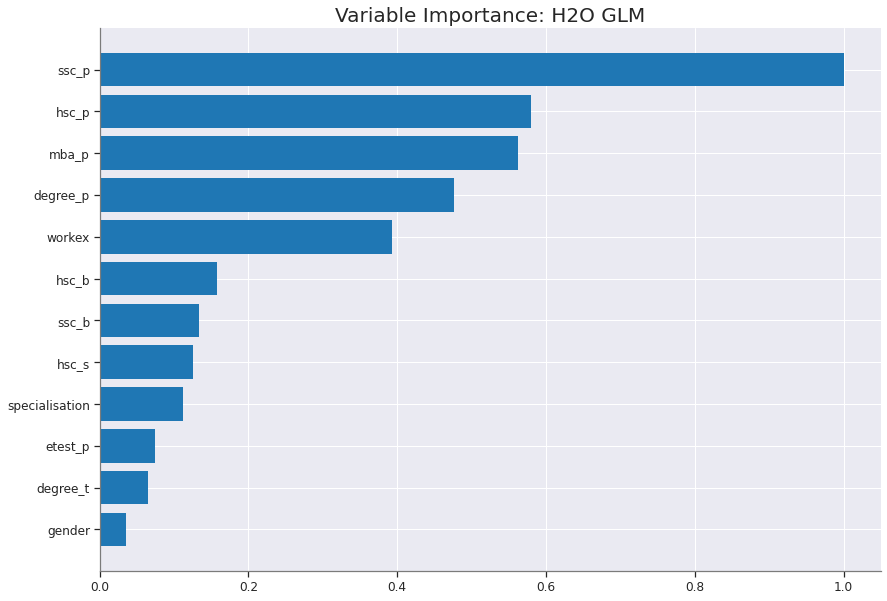

In [116]:
# aml.leader.varimp(use_pandas=True)
aml.leader.varimp_plot(num_of_features = 12)

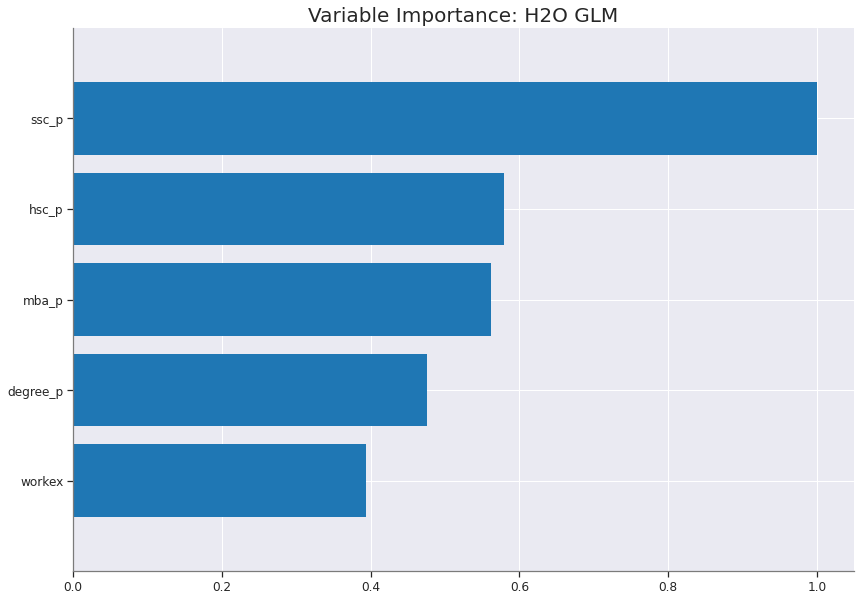

In [120]:
aml.leader.varimp_plot(num_of_features = 5)

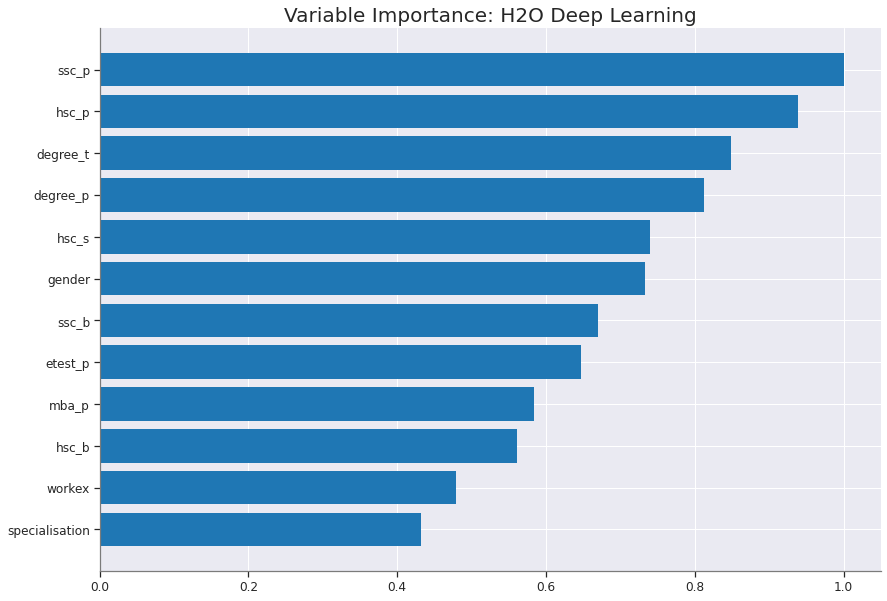

In [117]:
h2o.get_model(lb[1, "model_id"]).varimp_plot(num_of_features = 12)

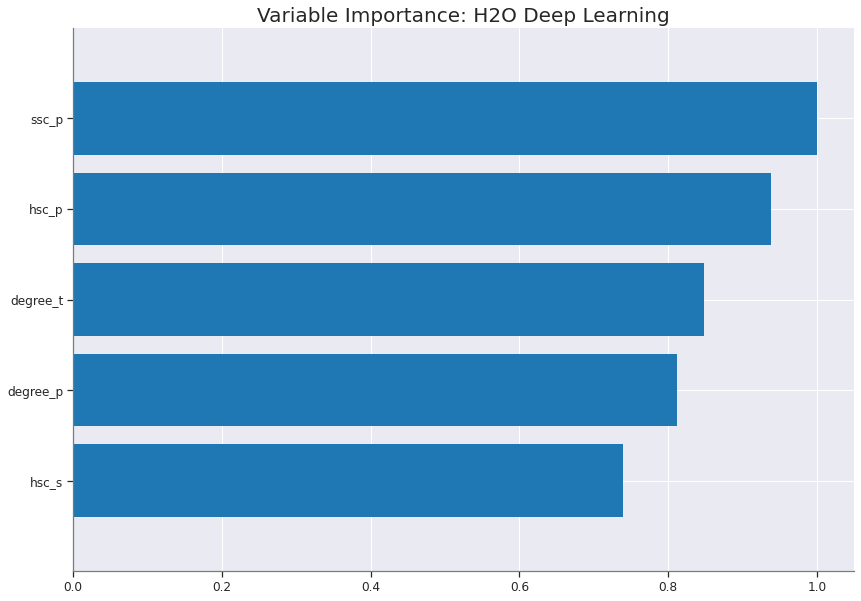

In [121]:
h2o.get_model(lb[1, "model_id"]).varimp_plot(num_of_features = 5)

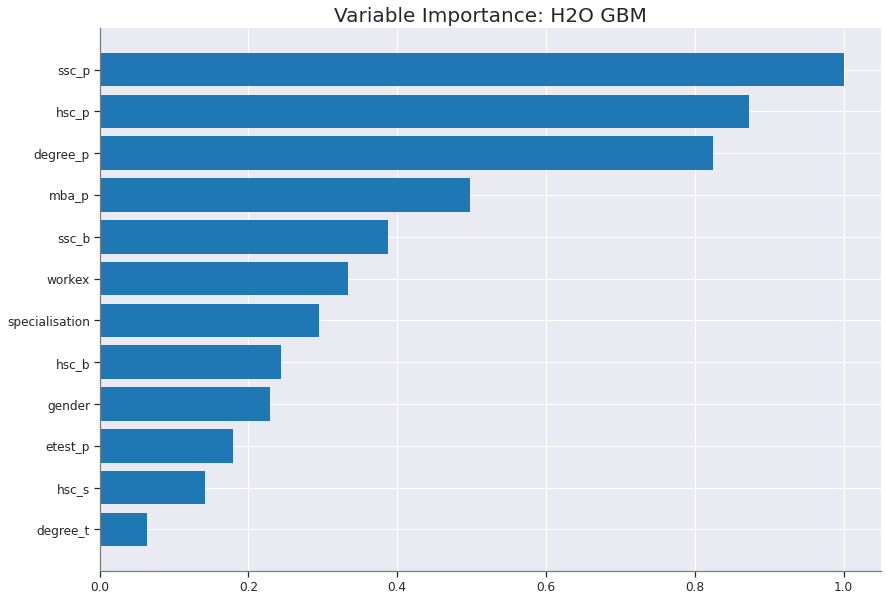

In [118]:
h2o.get_model(lb[2, "model_id"]).varimp_plot(num_of_features = 12)

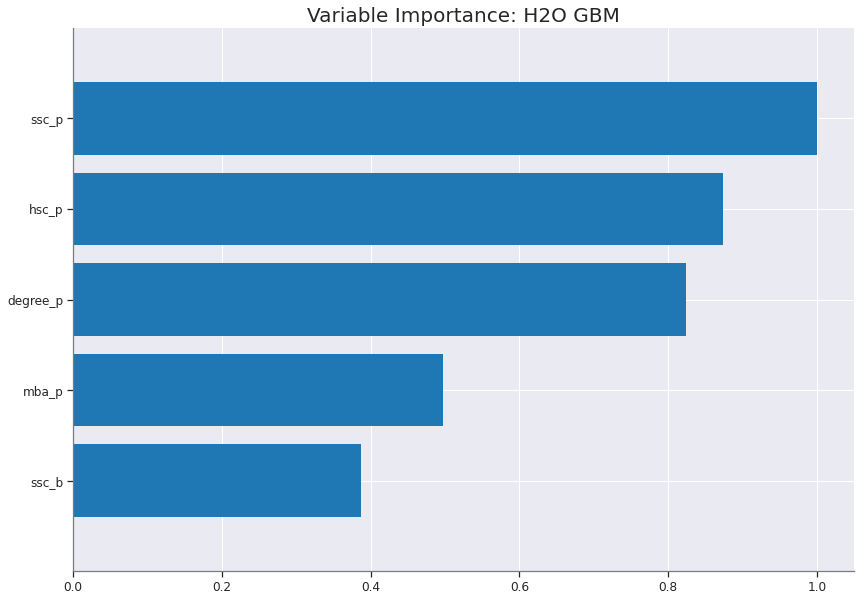

In [122]:
h2o.get_model(lb[2, "model_id"]).varimp_plot(num_of_features = 5)

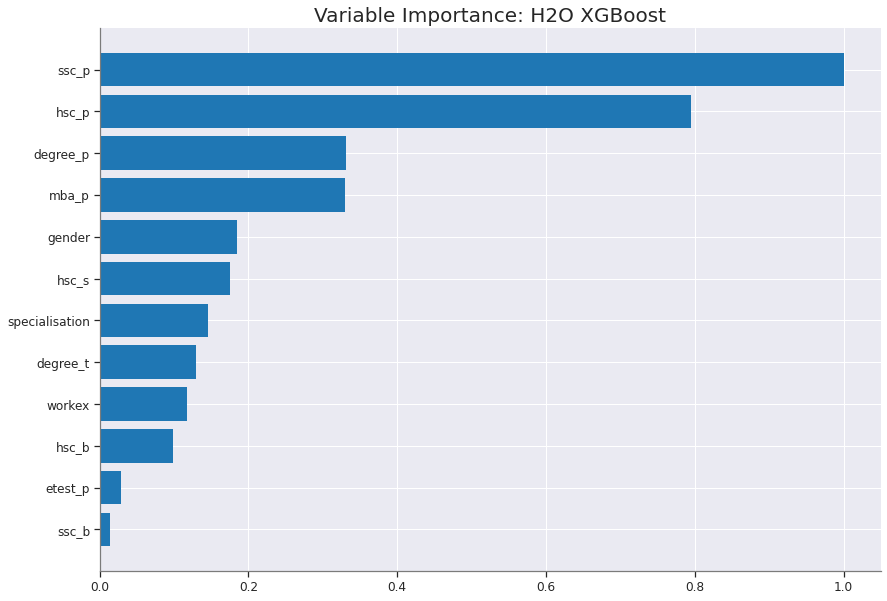

In [119]:
h2o.get_model(lb[8, "model_id"]).varimp_plot(num_of_features = 12)

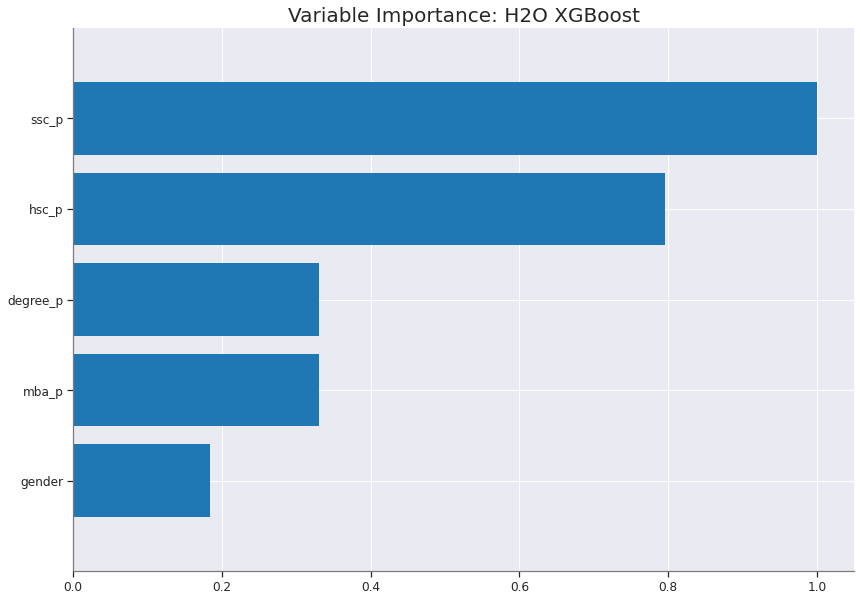

In [123]:
h2o.get_model(lb[8, "model_id"]).varimp_plot(num_of_features = 5)

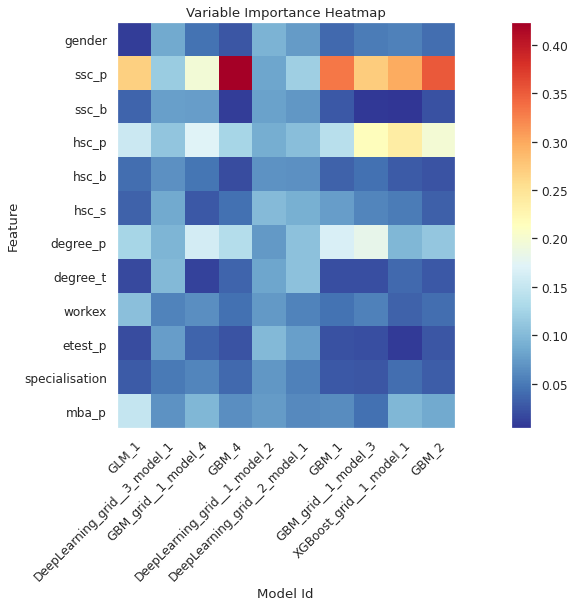

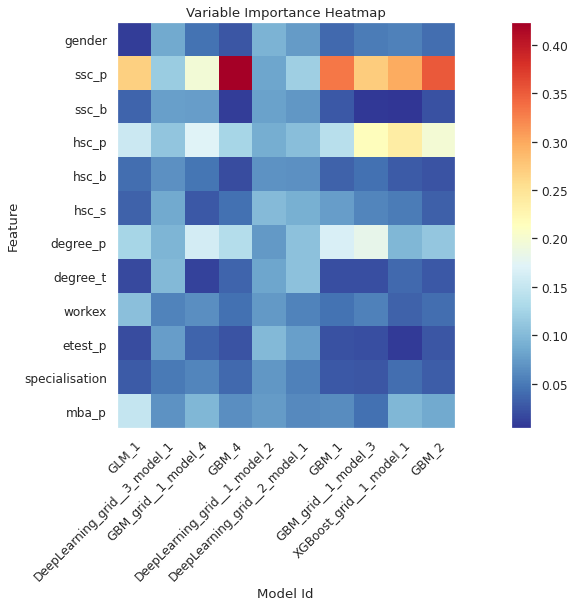

In [124]:
aml.varimp_heatmap(top_n = 10, cluster = False)

Conclusões da Classificação:
* Melhor modelo GLM - Modelo Linear Generalizado;
* O gênero não se mostra importante para nenhum dos modelos, sendo a variável menos importante para o GLM;
* O GLM obteve uma acurácia média em 10 *folds* de 91\%, podendo portanto ser utilizado como um bom previsor se a pessoa terá emprego formal ou não;

In [127]:
columns_cat = ['gender', 'workex','ssc_b', 'hsc_b','specialisation','hsc_s', 'degree_t']
encoder = CatBoostEncoder(cols = columns_cat)
val_cat = df.dropna()[columns_cat]
features_encoded = encoder.fit_transform(val_cat, df['salary'].dropna())

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [128]:
df_for_regression = df.drop(columns = ['status', 'sl_no']).dropna().copy()
for col in columns_cat:
  df_for_regression[col] = features_encoded[col].values.ravel()

In [129]:
df_for_regression.sample(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,salary
23,291931.081081,77.4,302109.234234,60.0,287522.200772,275163.851351,64.74,274131.081081,248331.925676,92.0,270304.617117,63.62,300000.0
177,261457.102451,73.0,285906.697138,97.0,285346.174096,285517.775468,79.00,275961.556384,301866.461916,89.0,298227.504944,70.81,650000.0
117,288295.385008,77.0,286942.814766,75.0,285071.674616,285333.011583,73.00,305793.114543,277234.359359,80.0,283368.846525,67.05,240000.0
86,288087.033462,62.0,296625.921376,63.0,288316.385135,277301.731419,64.00,268151.259214,285116.385135,67.0,284605.804668,57.03,220000.0
140,294853.990709,65.0,283771.396396,64.8,279185.006435,287752.877878,69.50,277103.451424,293810.350123,56.0,290525.081900,56.94,265000.0


In [130]:
from sklearn.preprocessing import QuantileTransformer
input_ml = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',\
            'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']
output_ml = ['salary']
sc = StandardScaler()
sc_out = QuantileTransformer(n_quantiles = 100, output_distribution = 'normal')
data = pd.DataFrame(sc.fit_transform(df_for_regression[input_ml]), columns=input_ml)
vals = sc_out.fit_transform(df_for_regression[output_ml])
data[output_ml[0]] = vals.ravel()

In [131]:
h2o.init()
hf = h2o.H2OFrame(data[input_ml + output_ml])

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,1 hour 32 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.3
H2O_cluster_version_age:,1 month and 5 days
H2O_cluster_name:,H2O_from_python_unknownUser_43l8ii
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.998 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [133]:
from h2o.automl import H2OAutoML

# Run AutoML for 25 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=25, seed=1, nfolds = 10, sort_metric='RMSE', exclude_algos = ['StackedEnsemble'])
aml.train(x=input_ml, y=output_ml[0], training_frame=hf)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

AutoML progress: |█████████████
16:56:15.34: Skipping training of model GBM_5_AutoML_20210625_165601 due to exception: water.exceptions.H2OModelBuilderIllegalArgumentException: Illegal argument(s) for GBM model: GBM_5_AutoML_20210625_165601.  Details: ERRR on field: _min_rows: The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 148.0.


███████████████████████████████████████████| 100%


model_id,rmse,mean_residual_deviance,mse,mae,rmsle
DeepLearning_grid__2_AutoML_20210625_165601_model_1,1.41071,1.99011,1.99011,0.904296,nan
GLM_1_AutoML_20210625_165601,1.41414,1.99979,1.99979,0.922592,nan
DeepLearning_grid__3_AutoML_20210625_165601_model_1,1.41706,2.00807,2.00807,0.948959,nan
DeepLearning_grid__1_AutoML_20210625_165601_model_2,1.46324,2.14108,2.14108,1.04374,nan
DeepLearning_grid__1_AutoML_20210625_165601_model_1,1.49099,2.22305,2.22305,1.05913,nan
GBM_3_AutoML_20210625_165601,1.50259,2.25778,2.25778,1.00922,nan
GBM_4_AutoML_20210625_165601,1.50778,2.2734,2.2734,1.00106,nan
GBM_2_AutoML_20210625_165601,1.51652,2.29982,2.29982,1.01358,nan
GBM_grid__1_AutoML_20210625_165601_model_3,1.52795,2.33462,2.33462,1.02137,nan
DeepLearning_1_AutoML_20210625_165601,1.55567,2.4201,2.4201,1.11816,nan


In [ ]:
lb = h2o.automl.get_leaderboard(aml, extra_columns = 'ALL')
lb

In [135]:
aml.leader

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_grid__2_AutoML_20210625_165601_model_1


Status of Neuron Layers: predicting salary, regression, gaussian distribution, Quadratic loss, 3,251 weights/biases, 43.9 KB, 1,160,320 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,12,Input,20,,,,,,,,,
1,,2,50,RectifierDropout,40,0,0,0.00779463,0.00801497,0,-0.000677869,0.742656,-0.677082,0.701344
2,,3,50,RectifierDropout,40,0,0,0.00660905,0.00731689,0,-0.246434,0.390722,0.417233,0.40566
3,,4,1,Linear,,0,0,0.00282364,0.00090521,0,-0.0573379,0.764625,-0.154725,1.09713e-154




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 0.33889485723804763
RMSE: 0.5821467660633766
MAE: 0.4463884624419709
RMSLE: NaN
Mean Residual Deviance: 0.33889485723804763

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 1.99011351218801
RMSE: 1.4107138307211744
MAE: 0.9042955581249092
RMSLE: NaN
Mean Residual Deviance: 1.99011351218801

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,0.90515286,0.39577758,0.705533,0.9014302,0.8542214,1.7577056,0.91985077,0.43156797,0.44961688,1.0944136,0.681736,1.2554533
1,mean_residual_deviance,1.998002,1.7116405,0.77843374,2.3117743,2.0074239,5.3632774,1.1757233,0.27887332,0.2975533,2.6034548,0.8663413,4.2971654
2,mse,1.998002,1.7116405,0.77843374,2.3117743,2.0074239,5.3632774,1.1757233,0.27887332,0.2975533,2.6034548,0.8663413,4.2971654
3,r2,0.002224913,0.23726547,-0.26481035,-6.348887E-4,0.14394233,-0.17746274,-0.336825,0.32433596,0.39744312,-0.009614721,0.028629502,-0.08275406
4,residual_deviance,1.998002,1.7116405,0.77843374,2.3117743,2.0074239,5.3632774,1.1757233,0.27887332,0.2975533,2.6034548,0.8663413,4.2971654
5,rmse,1.2910587,0.60660225,0.88228893,1.5204519,1.4168359,2.315875,1.0843078,0.5280846,0.5454845,1.6135225,0.93077457,2.0729604
6,rmsle,0.5242481,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.5242481,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2021-06-25 17:02:04,0.000 sec,None,0.0,0,0.0,NaN,NaN,NaN,NaN
1,,2021-06-25 17:02:04,2 min 18.872 sec,34418 obs/sec,10.0,1,1480.0,1.348797,1.819254,0.907372,0.105557
2,,2021-06-25 17:02:09,2 min 23.876 sec,71887 obs/sec,2450.0,245,362600.0,0.495115,0.245139,0.413326,0.879476
3,,2021-06-25 17:02:14,2 min 28.891 sec,76818 obs/sec,5220.0,522,772560.0,0.593636,0.352404,0.481729,0.826739
4,,2021-06-25 17:02:18,2 min 33.570 sec,78761 obs/sec,7840.0,784,1160320.0,0.582147,0.338895,0.446388,0.833381



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,degree_t,1.000000,1.000000,0.122547
1,mba_p,0.929768,0.929768,0.113940
2,gender,0.902155,0.902155,0.110556
3,specialisation,0.745108,0.745108,0.091311
4,hsc_s,0.710922,0.710922,0.087121
5,ssc_p,0.634503,0.634503,0.077756
6,degree_p,0.617785,0.617785,0.075708
7,workex,0.593760,0.593760,0.072763
8,etest_p,0.568230,0.568230,0.069635
9,hsc_p,0.521355,0.521355,0.063890


In [136]:
print(h2o.get_model(lb[1, "model_id"]))

Model Details
H2OGeneralizedLinearEstimator :  Generalized Linear Modeling
Model Key:  GLM_1_AutoML_20210625_165601


GLM Model: summary


,,family,link,regularization,lambda_search,number_of_predictors_total,number_of_active_predictors,number_of_iterations,training_frame
0,,gaussian,identity,Ridge ( lambda = 0.2535 ),"nlambda = 30, lambda.max = 21.624, lambda.min = 0.2535, lambda.1se...",12,12,15,automl_training_Key_Frame__upload_806844ab218218c82159b3134dd94a1a...




ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 1.805150730189843
RMSE: 1.3435589790514755
MAE: 0.8815387418891689
RMSLE: NaN
R^2: 0.11249067470989993
Mean Residual Deviance: 1.805150730189843
Null degrees of freedom: 147
Residual degrees of freedom: 135
Null deviance: 301.02478977420236
Residual deviance: 267.16230806809676
AIC: 535.4211319372323

ModelMetricsRegressionGLM: glm
** Reported on cross-validation data. **

MSE: 1.999786917450936
RMSE: 1.4141382243086904
MAE: 0.9225915196292812
RMSLE: NaN
R^2: 0.016797041849133554
Mean Residual Deviance: 1.999786917450936
Null degrees of freedom: 147
Residual degrees of freedom: 147
Null deviance: 305.702532751331
Residual deviance: 295.9684637827385
AIC: 526.5758196027874

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,0.92997736,0.3584561,0.6951305,0.86596066,0.8965873,1.6346402,0.82815087,0.52724385,0.59435993,1.1016003,0.7309232,1.4251766
1,mean_residual_deviance,2.0076363,1.594689,0.71923023,2.246364,2.3483226,4.9504128,1.1874309,0.39987162,0.59606755,2.3170946,0.8939398,4.4176283
2,mse,2.0076363,1.594689,0.71923023,2.246364,2.3483226,4.9504128,1.1874309,0.39987162,0.59606755,2.3170946,0.8939398,4.4176283
3,null_deviance,30.570253,23.371458,10.726745,35.4221,36.173416,73.78406,18.229116,6.490908,10.405062,38.693974,12.511146,63.266006
4,r2,-0.07691986,0.13625947,-0.16861565,0.027677363,-0.0014325308,-0.08682175,-0.35013673,0.031177023,-0.20705964,0.10143522,-0.00231488,-0.11310707
5,residual_deviance,29.583387,23.27996,10.788453,33.69546,35.22484,74.25619,17.811462,5.9980745,8.941013,34.756416,12.515158,61.846794
6,rmse,1.3167839,0.55147916,0.84807444,1.4987875,1.5324237,2.2249522,1.0896931,0.632354,0.7720541,1.5222006,0.9454839,2.1018155
7,rmsle,0.70317286,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.70317286,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,iteration,lambda,predictors,deviance_train,deviance_xval,deviance_se,alpha,iterations,training_rmse,training_deviance,training_mae,training_r2
0,,2021-06-25 16:56:05,0.000 sec,1,.22E2,13,2.019586,2.073462,0.508337,0.0,NaN,,,,
1,,2021-06-25 16:56:05,0.000 sec,2,.16E2,13,2.014576,2.073192,0.508917,0.0,NaN,,,,
2,,2021-06-25 16:56:05,0.000 sec,3,.11E2,13,2.007982,2.072814,0.509664,0.0,NaN,,,,
3,,2021-06-25 16:56:05,0.001 sec,4,.83E1,13,1.999425,2.072278,0.510610,0.0,NaN,,,,
4,,2021-06-25 16:56:05,0.001 sec,5,.61E1,13,1.988516,2.071534,0.511782,0.0,NaN,,,,
5,,2021-06-25 16:56:05,0.001 sec,6,.44E1,13,1.974948,2.055799,0.506034,0.0,NaN,,,,
6,,2021-06-25 16:56:05,0.002 sec,7,.32E1,13,1.958543,2.050364,0.505836,0.0,NaN,,,,
7,,2021-06-25 16:56:05,0.002 sec,8,.23E1,13,1.939405,2.043932,0.505580,0.0,NaN,,,,
8,,2021-06-25 16:56:05,0.002 sec,9,.17E1,13,1.918024,2.036703,0.505254,0.0,NaN,,,,
9,,2021-06-25 16:56:05,0.002 sec,10,.12E1,13,1.895323,2.029114,0.504843,0.0,NaN,,,,



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,gender,0.218603,1.000000,0.162390
1,etest_p,0.196345,0.898182,0.145856
2,hsc_s,0.193525,0.885278,0.143760
3,degree_t,0.153888,0.703962,0.114316
4,degree_p,0.148141,0.677670,0.110047
5,ssc_b,0.107111,0.489981,0.079568
6,hsc_b,0.103565,0.473758,0.076934
7,mba_p,0.066406,0.303776,0.049330
8,workex,0.065203,0.298271,0.048436
9,ssc_p,0.057500,0.263032,0.042714


In [137]:
print(h2o.get_model(lb[5, "model_id"]))

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_3_AutoML_20210625_165601


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,30.0,30.0,5312.0,4.0,7.0,5.266667,8.0,11.0,9.466666




ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 0.7160998757964145
RMSE: 0.8462268465349079
MAE: 0.5189701809824722
RMSLE: NaN
Mean Residual Deviance: 0.7160998757964145

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2.257778167996544
RMSE: 1.5025904857932995
MAE: 1.009218437015766
RMSLE: NaN
Mean Residual Deviance: 2.257778167996544

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,1.0113001,0.37763575,0.7655197,0.88386816,1.0194188,1.77509,0.9414789,0.48589835,0.7044965,1.2065436,0.88007015,1.4506168
1,mean_residual_deviance,2.2649045,1.7028191,1.038074,2.3006713,2.7071702,5.727943,1.5981545,0.32652646,0.8910869,2.474925,1.1022489,4.482244
2,mse,2.2649045,1.7028191,1.038074,2.3006713,2.7071702,5.727943,1.5981545,0.32652646,0.8910869,2.474925,1.1022489,4.482244
3,r2,-0.28322718,0.36394215,-0.68667763,0.0041708997,-0.1544616,-0.25752196,-0.8171392,0.20888023,-0.80448514,0.040228907,-0.2358779,-0.1293883
4,residual_deviance,2.2649045,1.7028191,1.038074,2.3006713,2.7071702,5.727943,1.5981545,0.32652646,0.8910869,2.474925,1.1022489,4.482244
5,rmse,1.4094096,0.55624604,1.0188591,1.5167964,1.6453481,2.393312,1.2641814,0.57142496,0.94397396,1.5731894,1.0498804,2.1171312
6,rmsle,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-06-25 16:56:12,0.927 sec,0.0,1.426167,0.947175,2.033951
1,,2021-06-25 16:56:12,0.939 sec,5.0,1.274156,0.820211,1.623473
2,,2021-06-25 16:56:12,0.952 sec,10.0,1.157078,0.731401,1.338829
3,,2021-06-25 16:56:12,0.965 sec,15.0,1.063261,0.656062,1.130525
4,,2021-06-25 16:56:12,0.977 sec,20.0,0.991240,0.603687,0.982556
5,,2021-06-25 16:56:12,0.990 sec,25.0,0.925523,0.560818,0.856592
6,,2021-06-25 16:56:13,1.003 sec,30.0,0.846227,0.518970,0.716100



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mba_p,183.728485,1.000000,0.169413
1,degree_p,159.459625,0.867909,0.147035
2,hsc_b,140.191528,0.763036,0.129269
3,gender,122.612831,0.667359,0.113059
4,hsc_s,86.971169,0.473368,0.080195
5,etest_p,71.564171,0.389510,0.065988
6,workex,69.824486,0.380042,0.064384
7,hsc_p,67.973763,0.369969,0.062678
8,degree_t,49.733292,0.270689,0.045858
9,specialisation,45.443645,0.247341,0.041903


In [138]:
print(h2o.get_model(lb[10, "model_id"]))

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_grid__1_AutoML_20210625_165601_model_2


Model Summary: 


,,number_of_trees
0,,31.0




ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.9445561090660896
RMSE: 0.9718827650833662
MAE: 0.6478447927589956
RMSLE: NaN
Mean Residual Deviance: 0.9445561090660896

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 2.454092370522663
RMSE: 1.566554298619318
MAE: 1.0658865445545196
RMSLE: NaN
Mean Residual Deviance: 2.454092370522663

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,mae,1.0685171,0.4119486,0.9571062,0.94118524,1.222954,1.7743146,0.9161592,0.4164041,0.6822229,1.2484726,0.8951865,1.6311653
1,mean_residual_deviance,2.4638777,1.7887967,1.3750627,2.7418432,3.172565,5.5803885,1.5269849,0.3037362,0.85340583,2.7088134,1.1787328,5.197244
2,mse,2.4638777,1.7887967,1.3750627,2.7418432,3.172565,5.5803885,1.5269849,0.3037362,0.85340583,2.7088134,1.1787328,5.197244
3,r2,-0.38810167,0.41780216,-1.2342217,-0.1867872,-0.35292736,-0.22512767,-0.73621756,0.2640973,-0.7281795,-0.050472602,-0.3216342,-0.30954635
4,residual_deviance,2.4638777,1.7887967,1.3750627,2.7418432,3.172565,5.5803885,1.5269849,0.3037362,0.85340583,2.7088134,1.1787328,5.197244
5,rmse,1.4693859,0.5819342,1.1726307,1.6558512,1.7811695,2.3622847,1.2357123,0.55112267,0.92379963,1.6458473,1.0856947,2.2797465
6,rmsle,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance
0,,2021-06-25 16:56:21,1.153 sec,0.0,1.550031,1.039350,2.402597
1,,2021-06-25 16:56:21,1.159 sec,5.0,1.320502,0.848071,1.743725
2,,2021-06-25 16:56:21,1.161 sec,10.0,1.196536,0.781810,1.431699
3,,2021-06-25 16:56:21,1.163 sec,15.0,1.133438,0.748901,1.284682
4,,2021-06-25 16:56:21,1.166 sec,20.0,1.075292,0.725128,1.156254
5,,2021-06-25 16:56:21,1.169 sec,25.0,1.029229,0.681921,1.059312
6,,2021-06-25 16:56:21,1.172 sec,30.0,0.980327,0.653571,0.961042
7,,2021-06-25 16:56:21,1.178 sec,31.0,0.971883,0.647845,0.944556



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,mba_p,49.409172,1.000000,0.156872
1,etest_p,39.801575,0.805550,0.126368
2,hsc_b,34.092781,0.690009,0.108243
3,gender,29.189964,0.590780,0.092677
4,degree_p,27.481243,0.556197,0.087252
5,specialisation,25.562317,0.517360,0.081159
6,degree_t,25.184753,0.509718,0.079960
7,hsc_s,25.116354,0.508334,0.079743
8,ssc_b,22.989010,0.465278,0.072989
9,workex,14.656760,0.296640,0.046535


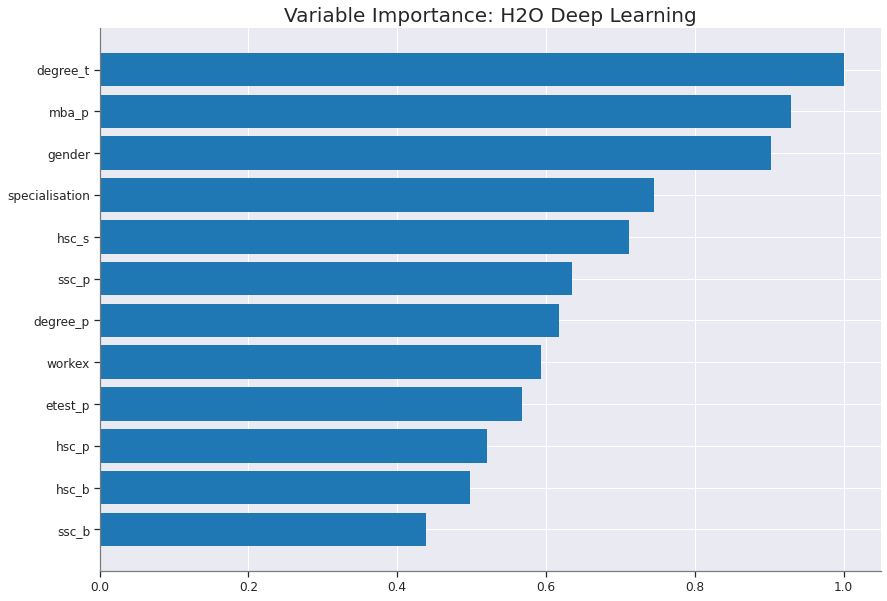

In [139]:
h2o.get_model(lb[0, "model_id"]).varimp_plot(num_of_features = 12)

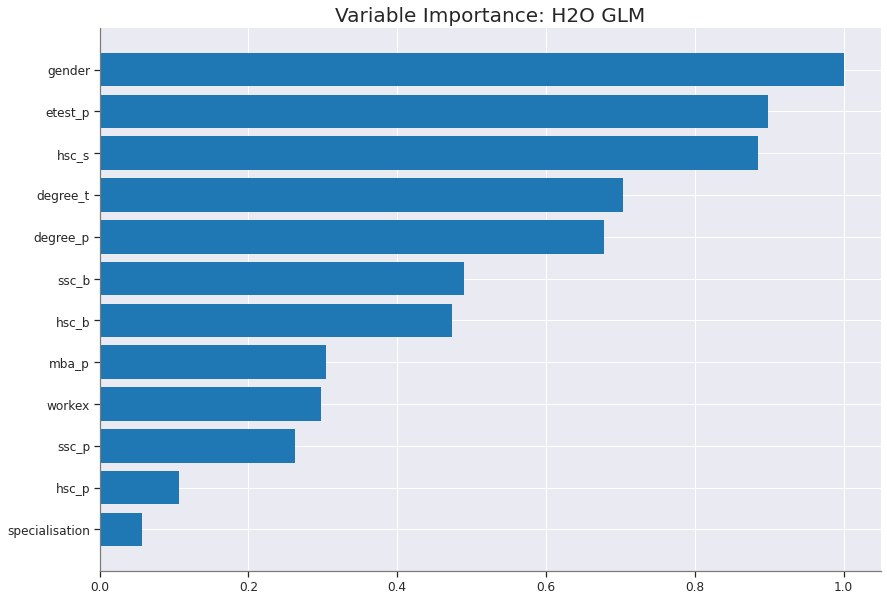

In [140]:
h2o.get_model(lb[1, "model_id"]).varimp_plot(num_of_features = 12)

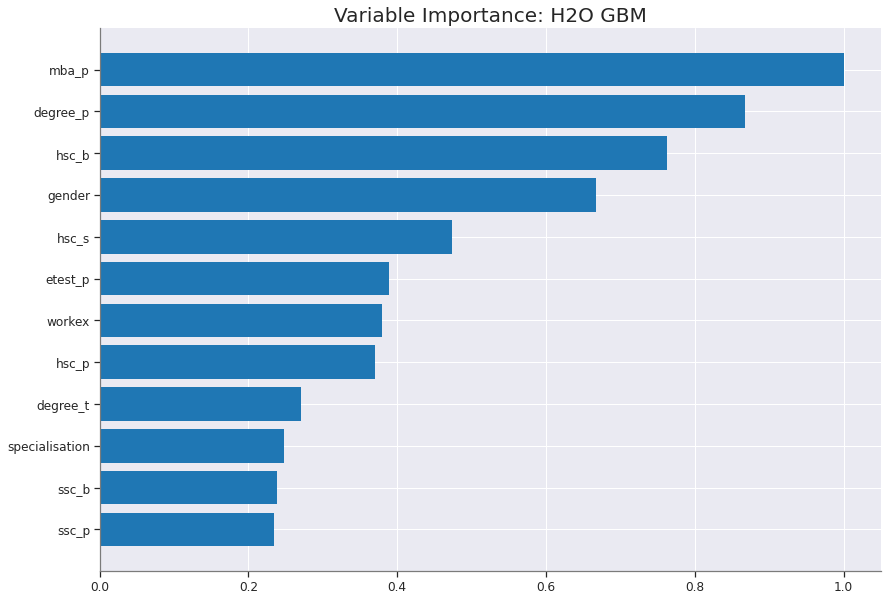

In [141]:
h2o.get_model(lb[5, "model_id"]).varimp_plot(num_of_features = 12)

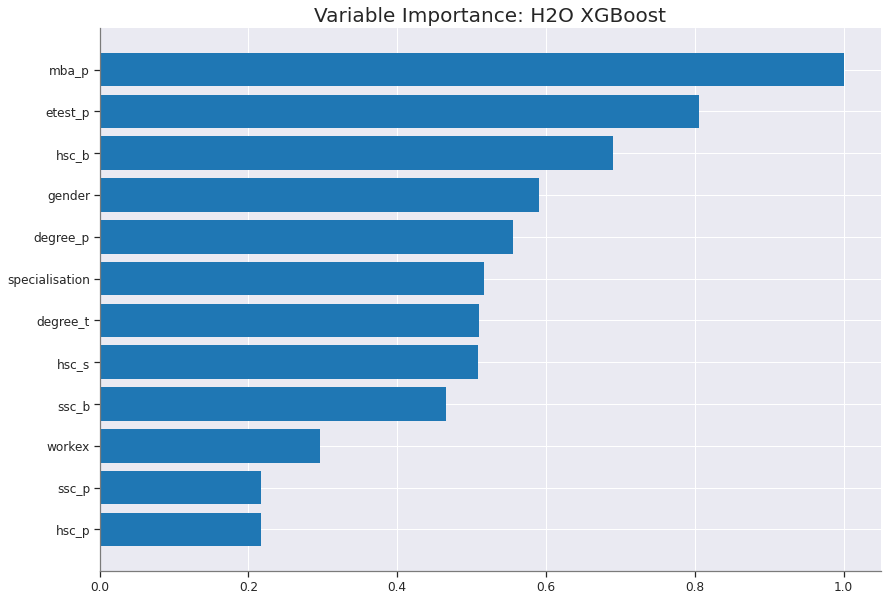

In [142]:
h2o.get_model(lb[10, "model_id"]).varimp_plot(num_of_features = 12)

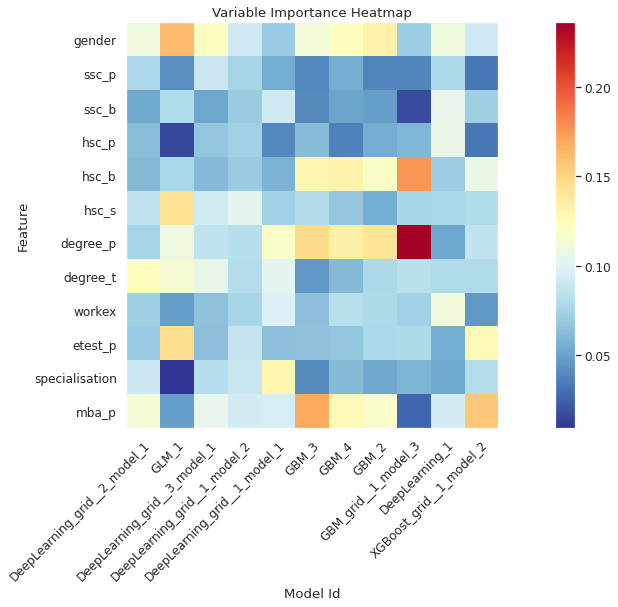

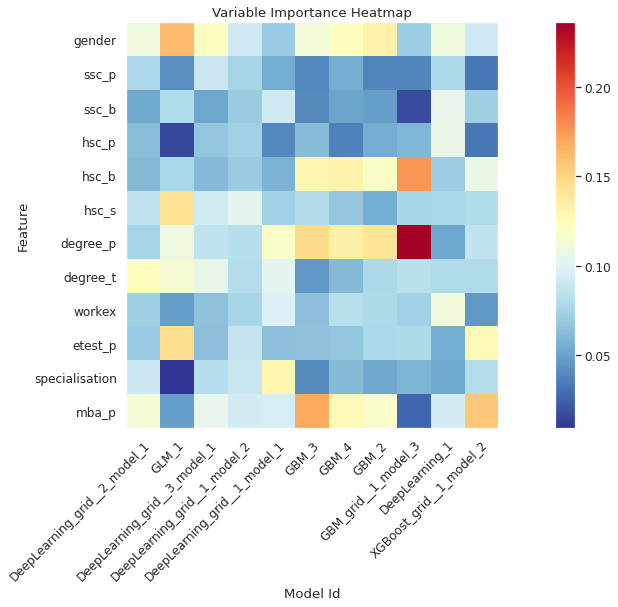

In [144]:
aml.varimp_heatmap(top_n = 11, cluster = False)